### Load data

In [1]:
import pandas as pd
import numpy as np
import joblib
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from lightgbm.sklearn import LGBMRegressor

In [2]:
# Load dataset 
f = 'C:/Users/songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/2. vrh_avg_shear (done)/'
df = joblib.load(f + 'database_moduli_merged.pkl')

# Define features and target variable
features = joblib.load(f + 'features.pkl')
print('No. of features', len(features))

df.head()

No. of features 4053


minimum_oxidation_state  maximum_oxidation_state  range_oxidation_state  \
0                        0                        0                      0   
1                        0                        0                      0   
2                       -4                        3                      7   
3                        0                        0                      0   
4                        0                        0                      0   

   std_dev_oxidation_state  compound_possible  max_ionic_char  avg_ionic_char  \
0                 0.000000                  1        0.225103        0.033820   
1                 0.000000                  1        0.269189        0.043433   
2                 4.107919                  1        0.201983        0.032317   
3                 0.000000                  1        0.213451        0.040022   
4                 0.000000                  1        0.225103        0.034795   

   avg_anion_electron_affinity  minimum_EN_difference  maximum_EN_difference  \
0                          0.0                    0.0                   0.00   
1                          0.0                    0.0                   0.00   
2                    -534400.0                    0.0                   0.95   
3                          0.0                    0.0                   0.00   
4                          0.0                    0.0                   0.00   

   ...  LUMO_element_ohe_Zr  crystal_system_ohe_cubic  \
0  ...                    0                         0   
1  ...                    0                         0   
2  ...                    0                         0   
3  ...                    0                         1   
4  ...                    0                         0   

   crystal_system_ohe_hexagonal  crystal_system_ohe_monoclinic  \
0                             0                              0   
1                             0                              0   
2                             0                              0   
3                             0                              0   
4                             0                              0   

   crystal_system_ohe_orthorhombic  crystal_system_ohe_tetragonal  \
0                                0                              1   
1                                0                              1   
2                                0                              1   
3                                0                              0   
4                                0                              1   

   crystal_system_ohe_triclinic  crystal_system_ohe_trigonal  log10G_VRH  \
0                             0                            0    1.447158   
1                             0                            0    1.518514   
2                             0                            0    1.740363   
3                             0                            0    1.707570   
4                             0                            0    1.602060   

   log10K_VRH  
0    1.707570  
1    1.633468  
2    1.908485  
3    2.117271  
4    1.690196  

[5 rows x 4055 columns]

In [3]:
target = 'log10K_VRH'

print(target)
print('Max value:', df[target].max())
print('Min value:', df[target].min())

log10K_VRH
Max value: 2.7596678446896306
Min value: 0.0


### Split & Scale Features

In [4]:
!cd

c:\Users\songy\OneDrive\Documents\GBSFS4MPP_local\new_properties\2. vrh_avg_shear (done)


In [5]:
# Split dataset
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42) 

In [6]:
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/2. vrh_avg_shear (done)/'
path_to_save = path + target + '_results/'

# Save unscaled data
joblib.dump(df_train, path_to_save + 'df_train_' + target + '.pkl')
joblib.dump(df_test, path_to_save + 'df_test_' + target + '.pkl')

['C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/2. vrh_avg_shear (done)/log10K_VRH_results/df_test_log10K_VRH.pkl']

In [7]:
# Scale the features
scaling = MinMaxScaler(feature_range=(0, 1))

df_train[features] = pd.DataFrame(
                                    scaling.fit_transform(df_train[features].values),
                                    columns=df_train[features].columns,
                                    index=df_train[features].index
                                )
                                
df_train

c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\pandas\core\frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


minimum_oxidation_state  maximum_oxidation_state  range_oxidation_state  \
5846                     1.00                    0.000               0.000000   
5079                     1.00                    0.000               0.000000   
8672                     0.50                    0.375               0.454545   
292                      1.00                    0.000               0.000000   
3455                     0.25                    0.500               0.636364   
...                       ...                      ...                    ...   
5734                     1.00                    0.000               0.000000   
5191                     1.00                    0.000               0.000000   
5390                     0.25                    0.250               0.454545   
860                      1.00                    0.000               0.000000   
7270                     1.00                    0.000               0.000000   

      std_dev_oxidation_state  compound_possible  max_ionic_char  \
5846                 0.000000                0.0        0.373969   
5079                 0.000000                0.0        0.265772   
8672                 0.379473                0.0        0.231647   
292                  0.000000                0.0        0.411090   
3455                 0.551362                0.0        0.090451   
...                       ...                ...             ...   
5734                 0.000000                0.0        0.198940   
5191                 0.000000                0.0        0.517578   
5390                 0.433013                0.0        0.341770   
860                  0.000000                0.0        0.274494   
7270                 0.000000                0.0        0.060744   

      avg_ionic_char  avg_anion_electron_affinity  minimum_EN_difference  \
5846        0.276867                     1.000000               0.167102   
5079        0.249143                     1.000000               0.167102   
8672        0.198242                     0.350227               0.375979   
292         0.365413                     1.000000               0.167102   
3455        0.045225                     0.649123               0.321149   
...              ...                          ...                    ...   
5734        0.145397                     1.000000               0.167102   
5191        0.474013                     1.000000               0.167102   
5390        0.192346                     0.619883               0.245431   
860         0.242065                     1.000000               0.167102   
7270        0.045558                     1.000000               0.167102   

      maximum_EN_difference  ...  LUMO_element_ohe_Zr  \
5846               0.126027  ...                  0.0   
5079               0.126027  ...                  0.0   
8672               0.394521  ...                  0.0   
292                0.126027  ...                  0.0   
3455               0.287671  ...                  0.0   
...                     ...  ...                  ...   
5734               0.126027  ...                  0.0   
5191               0.126027  ...                  0.0   
5390               0.463014  ...                  0.0   
860                0.126027  ...                  0.0   
7270               0.126027  ...                  0.0   

      crystal_system_ohe_cubic  crystal_system_ohe_hexagonal  \
5846                       1.0                           0.0   
5079                       1.0                           0.0   
8672                       0.0                           1.0   
292                        0.0                           0.0   
3455                       0.0                           0.0   
...                        ...                           ...   
5734                       1.0                           0.0   
5191                       1.0                           0.0   
5390                       0.0            

In [8]:
# Create pandas.Dataframe of scaled test set using scaler as defined using training set

df_test[features] = pd.DataFrame(
                                    scaling.transform(df_test[features].values),
                                    columns=df_test[features].columns,
                                    index=df_test[features].index
                                )

df_test

c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\pandas\core\frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


minimum_oxidation_state  maximum_oxidation_state  \
107                       0.50                    0.125   
9775                      0.75                    0.375   
3424                      1.00                    0.000   
7945                      0.75                    0.500   
6054                      1.00                    0.000   
...                        ...                      ...   
10536                     1.00                    0.000   
5800                      1.00                    0.000   
2492                      0.25                    0.750   
6507                      1.00                    0.000   
10742                     1.00                    0.000   

       range_oxidation_state  std_dev_oxidation_state  compound_possible  \
107                 0.272727                 0.244949                0.0   
9775                0.363636                 0.338446                0.0   
3424                0.000000                 0.000000                0.0   
7945                0.454545                 0.328634                0.0   
6054                0.000000                 0.000000                0.0   
...                      ...                      ...                ...   
10536               0.000000                 0.000000                0.0   
5800                0.000000                 0.000000                0.0   
2492                0.818182                 0.594714                0.0   
6507                0.000000                 0.000000                0.0   
10742               0.000000                 0.000000                0.0   

       max_ionic_char  avg_ionic_char  avg_anion_electron_affinity  \
107          0.535785        0.466430                     0.350227   
9775         0.818756        0.627362                     0.467186   
3424         0.001735        0.001301                     1.000000   
7945         1.000000        0.803675                     0.467186   
6054         0.175503        0.121391                     1.000000   
...               ...             ...                          ...   
10536        0.142368        0.142368                     1.000000   
5800         0.202942        0.099400                     1.000000   
2492         0.003900        0.002925                     0.869883   
6507         0.244292        0.152314                     1.000000   
10742        0.038479        0.020157                     1.000000   

       minimum_EN_difference  maximum_EN_difference  ...  LUMO_element_ohe_Zr  \
107                 0.584856               0.578082  ...                  0.0   
9775                0.707572               0.775342  ...                  0.0   
3424                0.167102               0.126027  ...                  0.0   
7945                0.610966               1.000000  ...                  0.0   
6054                0.167102               0.126027  ...                  0.0   
...                      ...                    ...  ...                  ...   
10536               0.167102               0.126027  ...                  0.0   
5800                0.167102               0.126027  ...                  0.0   
2492                0.135770               0.093151  ...                  0.0   
6507                0.167102               0.126027  ...                  0.0   
10742               0.167102               0.126027  ...                  0.0   

       crystal_system_ohe_cubic  crystal_system_ohe_hexagonal  \
107                         0.0                           0.0   
9775                        0.0                           0.0   
3424                        1.0                           0.0   
7945                        0.0                           0.0   
6054                        1.0                           0.0   
...                         ...                           ...   
10536                       1.0                           0.0   
5800                        1.0                    

In [9]:
# Save 
joblib.dump(df_train, path_to_save + 'df_train_' + target + '_scaled.pkl')
joblib.dump(df_test, path_to_save + 'df_test_' + target + '_scaled.pkl')

['C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/2. vrh_avg_shear (done)/log10K_VRH_results/df_test_log10K_VRH_scaled.pkl']

#### GBFS

In [10]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import GBFS as gb

import joblib
import pandas as pd
import numpy as np

In [11]:
# Target
target = 'log10K_VRH'

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/2. vrh_avg_shear (done)/'
path_to_save = path + target + '_results_backup/'
path_to_file = path + target + '_results/' + 'df_train_' + target + '_scaled.pkl'

# Either a list or saved file
features = path + 'features.pkl'

problem = 'regression'

In [12]:
# Initialization 
FS = gb.GBFS(
            path_to_file = path_to_file, 
            path_to_save = path_to_save, 
            target = target,
            features = features,
            oversampled_it = False, 
            problem = problem
            )

Name of target column:  log10K_VRH
No. of exploratory features:  4053


In [13]:
# Conduct grid search to perform preliminary scan of the hyperparameter space & retrieve a trained model
FS.run(
        boosting_method = 'lightGBM', 
        cv_folds = 2
        )

Model employed:  lightGBM
Total no. of permutations: 18


   (1 of 18)  Attempt:  [('n_estimators', 100), ('learning_rate', 0.1), ('num_leaves', 30)]
   No. of rows in the training set: 7031
   Metric score:  -0.04880
   [*** Current optimal Hyperparameters ***]
Finished loading model, total used 100 iterations


   (2 of 18)  Attempt:  [('n_estimators', 100), ('learning_rate', 0.1), ('num_leaves', 40)]
   No. of rows in the training set: 7031
   Metric score:  -0.02426
   [*** Current optimal Hyperparameters ***]
Finished loading model, total used 100 iterations


   (3 of 18)  Attempt:  [('n_estimators', 100), ('learning_rate', 0.1), ('num_leaves', 50)]
   No. of rows in the training set: 7031
   Metric score:  -0.02649


   (4 of 18)  Attempt:  [('n_estimators', 100), ('learning_rate', 0.2), ('num_leaves', 30)]
   No. of rows in the training set: 7031
   Metric score:  -0.05069


   (5 of 18)  Attempt:  [('n_estimators', 100), ('learning_rate', 0.2), ('num_leaves', 40)]
   No. of ro

LGBMRegressor(importance_type='gain', num_leaves=40, objective='regression')

Result saved as: feature_relevance_score_log10K_VRH.pkl
Figure saved as: feature_relevance_plot_log10K_VRH.png


feature  relevance_score
0                                 vpa      1955.808515
1     PymatgenData_mean_melting_point       292.515231
2                      dimensionality       240.843513
3                             density       204.910386
4                 jml_mol_vol_divi_mp       177.409695
...                               ...              ...
4048                       OFM_f2__f2         0.000000
4049                       OFM_f2__f3         0.000000
4050                       OFM_f2__f4         0.000000
4051                       OFM_f2__f5         0.000000
4052      crystal_system_ohe_trigonal         0.000000

[4053 rows x 2 columns]

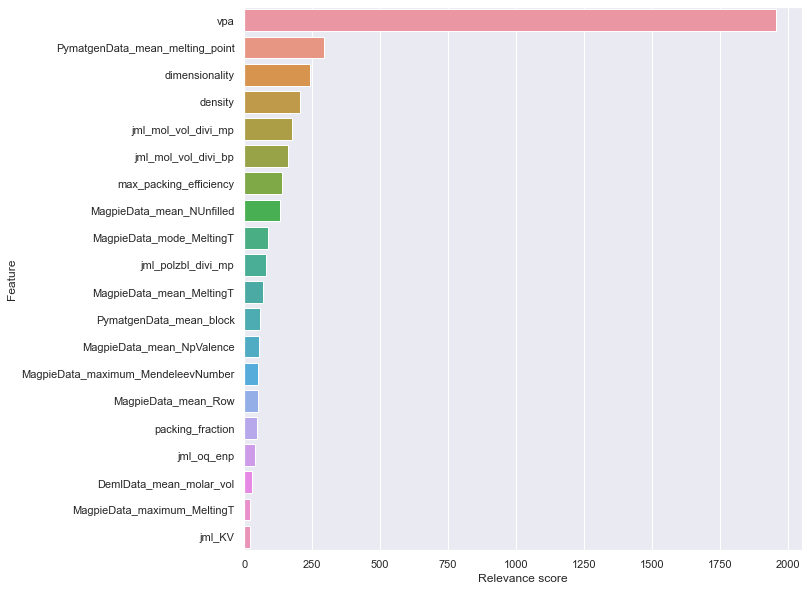

In [14]:
# Obtain feature relevance score
FS.feature_relevance(
                    plot = True, 
                    no_of_features = 20
                    )

In [15]:
# Perform recursive feature selection 
FS.recursive_selection(
                    stratify = False, 
                    oversample_technique = None, 
                    chosen_metric = 'rmse',
                    average = 'weighted',
                    no_to_terminate = 200,
                    max_no_imp = 10
                    )

   No. of rows in training set:  7031
No. of features considering:  1

n=1: mae_train=0.1933, mae_validation=0.2138 
n=1: mse_train=0.0689, mse_validation=0.0962 
n=1: rmse_train=0.2624, rmse_validation=0.3101 
n=1: r2_train=0.4824, r2_validation=0.3178 
n=1: max_error_train=1.7359, max_error_validation=1.7692 
--- 0.1901719570159912 seconds --- 

No. of features considering:  2

n=2: mae_train=0.1186, mae_validation=0.1669 
n=2: mse_train=0.0299, mse_validation=0.0587 
n=2: rmse_train=0.1730, rmse_validation=0.2424 
n=2: r2_train=0.7749, r2_validation=0.5832 
n=2: max_error_train=1.3234, max_error_validation=1.5508 
--- 0.08607792854309082 seconds --- 

No. of features considering:  3

n=3: mae_train=0.1054, mae_validation=0.1577 
n=3: mse_train=0.0219, mse_validation=0.0483 
n=3: rmse_train=0.1481, rmse_validation=0.2199 
n=3: r2_train=0.8351, r2_validation=0.6570 
n=3: max_error_train=1.2940, max_error_validation=1.3692 
--- 0.094085693359375 seconds --- 

No. of no improvements:  0

train_mae    va_mae  train_mse    va_mse  train_rmse  \
no_of_features                                                         
1                0.193263  0.213826   0.068857  0.096153    0.262406   
2                0.118573  0.166931   0.029944  0.058740    0.173043   
3                0.105400  0.157685   0.021936  0.048347    0.148109   
4                0.081570  0.151216   0.013823  0.043105    0.117573   
5                0.073864  0.140305   0.011574  0.038764    0.107581   
...                   ...       ...        ...       ...         ...   
195              0.034509  0.112958   0.002759  0.026242    0.052527   
196              0.034136  0.112556   0.002756  0.026163    0.052502   
197              0.034378  0.119313   0.002762  0.028256    0.052553   
198              0.034316  0.132336   0.002730  0.032597    0.052252   
199              0.034295  0.135258   0.002734  0.033735    0.052287   

                 va_rmse  train_r_sq   va_r_sq  train_max_error  va_max_error  
no_of_features                                                                 
1               0.310086    0.482424  0.317756         1.735867      1.769202  
2               0.242363    0.774921  0.583220         1.323370      1.550762  
3               0.219879    0.835113  0.656963         1.294045      1.369151  
4               0.207617    0.896094  0.694157         1.192272      1.712379  
5               0.196886    0.913004  0.724956         1.120000      1.602691  
...                  ...         ...       ...              ...           ...  
195             0.161993    0.979261  0.813804         0.668677      1.369229  
196             0.161749    0.979280  0.814365         0.656419      1.413825  
197             0.168095    0.979240  0.799513         0.703260      1.438722  
198             0.180546    0.979478  0.768714         0.709017      1.457820  
199             0.183672    0.979450  0.760635         0.662674      1.465298  

[199 rows x 10 columns]

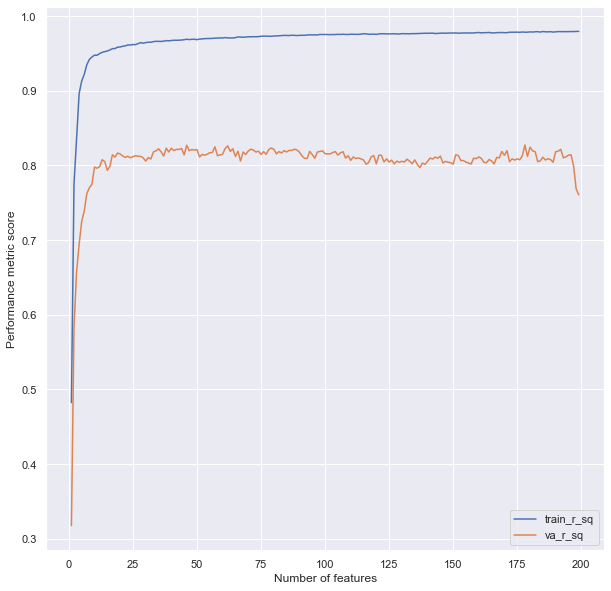

Result saved as: GBFS_convergence_plot_log10K_VRH.pkl


<Figure size 720x720 with 0 Axes>

In [16]:
# Plot the result
FS.convergence_plot(
                    train_metric = 'train_r_sq',
                    validation_metric = 'va_r_sq'
                    )

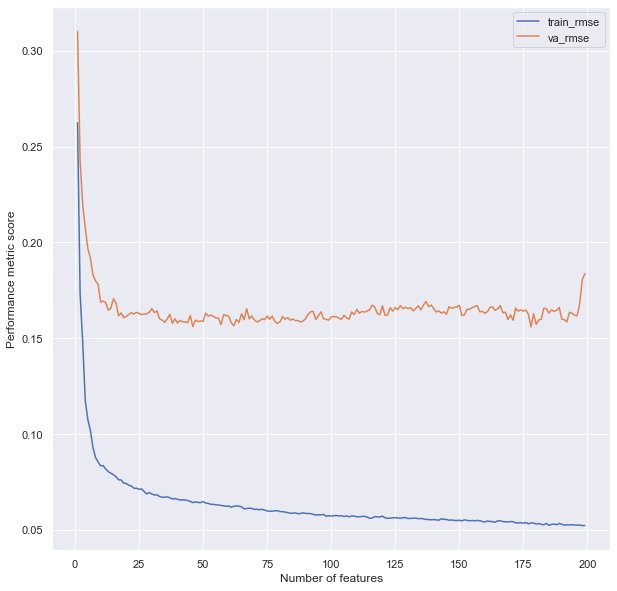

Result saved as: GBFS_convergence_plot_log10K_VRH.pkl


<Figure size 720x720 with 0 Axes>

In [17]:
# Plot the result
FS.convergence_plot(
                    train_metric = 'train_rmse',
                    validation_metric = 'va_rmse'
                    )

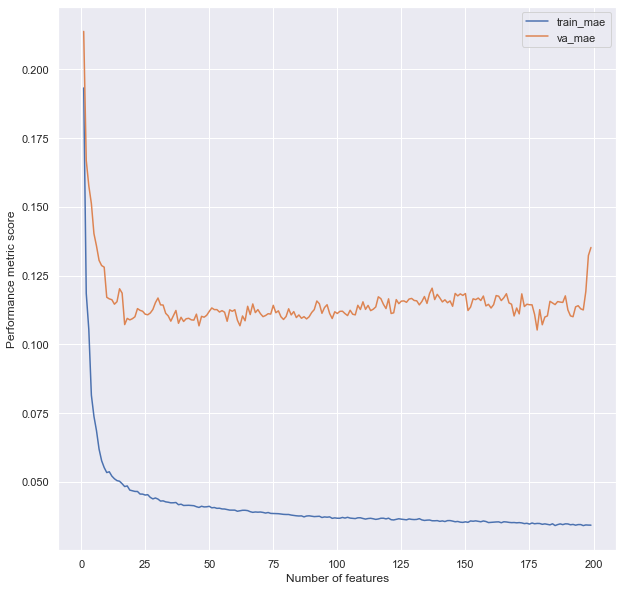

Result saved as: GBFS_convergence_plot_log10K_VRH.pkl


<Figure size 720x720 with 0 Axes>

In [18]:
# Plot the result
FS.convergence_plot(
                    train_metric = 'train_mae',
                    validation_metric = 'va_mae'
                    )

Load Saved Data & Generate Pretty Figure

In [19]:
import joblib
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Target
target = 'log10K_VRH'

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/2. vrh_avg_shear (done)/'
path_to_save = path + target + '_results_backup/'


df = joblib.load(path_to_save + 'GBFS_result_log10K_VRH.pkl')
df

train_mae    va_mae  train_mse    va_mse  train_rmse  \
no_of_features                                                         
1                0.193263  0.213826   0.068857  0.096153    0.262406   
2                0.118573  0.166931   0.029944  0.058740    0.173043   
3                0.105400  0.157685   0.021936  0.048347    0.148109   
4                0.081570  0.151216   0.013823  0.043105    0.117573   
5                0.073864  0.140305   0.011574  0.038764    0.107581   
...                   ...       ...        ...       ...         ...   
195              0.034509  0.112958   0.002759  0.026242    0.052527   
196              0.034136  0.112556   0.002756  0.026163    0.052502   
197              0.034378  0.119313   0.002762  0.028256    0.052553   
198              0.034316  0.132336   0.002730  0.032597    0.052252   
199              0.034295  0.135258   0.002734  0.033735    0.052287   

                 va_rmse  train_r_sq   va_r_sq  train_max_error  va_max_error  
no_of_features                                                                 
1               0.310086    0.482424  0.317756         1.735867      1.769202  
2               0.242363    0.774921  0.583220         1.323370      1.550762  
3               0.219879    0.835113  0.656963         1.294045      1.369151  
4               0.207617    0.896094  0.694157         1.192272      1.712379  
5               0.196886    0.913004  0.724956         1.120000      1.602691  
...                  ...         ...       ...              ...           ...  
195             0.161993    0.979261  0.813804         0.668677      1.369229  
196             0.161749    0.979280  0.814365         0.656419      1.413825  
197             0.168095    0.979240  0.799513         0.703260      1.438722  
198             0.180546    0.979478  0.768714         0.709017      1.457820  
199             0.183672    0.979450  0.760635         0.662674      1.465298  

[199 rows x 10 columns]

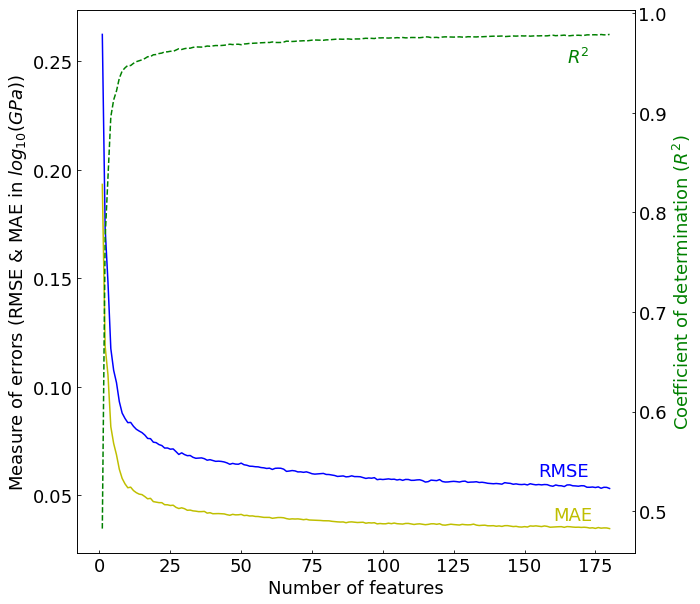

In [20]:
fig, ax1 = plt.subplots(figsize=(10, 10))

n = 180

ax2 = ax1.twinx()
ax1.plot(df['train_rmse'][:n], 'b-')
ax1.plot(df['train_mae'][:n], 'y-')

ax2.plot(df['train_r_sq'][:n], 'g--')

fontsize=18
ax1.set_xlabel('Number of features', fontsize=fontsize)
ax1.set_ylabel('Measure of errors (RMSE & MAE in $log_{10}(GPa)$)', fontsize=fontsize, color='k') #$log_{10}(GPa)$
ax2.set_ylabel('Coefficient of determination ($R^{2}$)', fontsize=fontsize, color='g')

ax1.tick_params(labelsize=fontsize, direction='in')
ax2.tick_params(labelsize=fontsize, direction='in')

x=155
y=0.535
plt.text(x, y, 'RMSE', c='b', fontsize=fontsize)
plt.text(x+5, y - 0.044, 'MAE', c='y', fontsize=fontsize)
plt.text(x+10, y + 0.415, '$R^{2}$', c='g', fontsize=fontsize)

plt.savefig(path_to_save + 'reg_gbfs_training_set.png', dpi = 300, bbox_inches="tight")
plt.show()

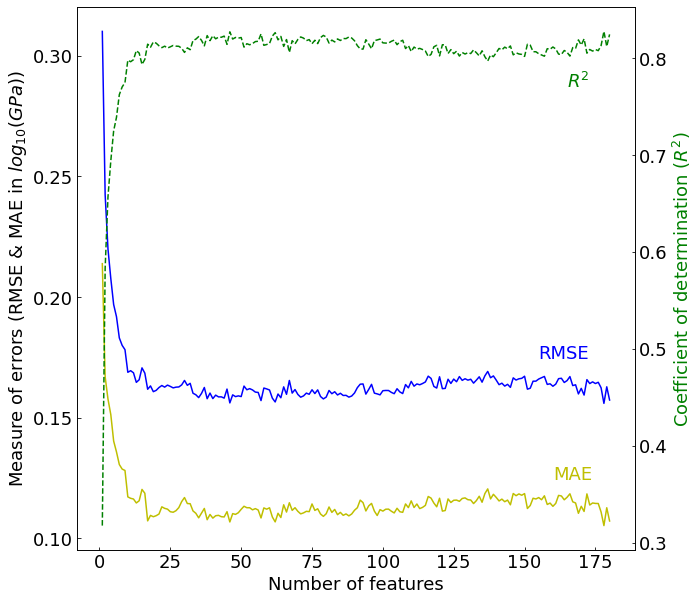

In [21]:
fig, ax1 = plt.subplots(figsize=(10, 10))

ax2 = ax1.twinx()
ax1.plot(df['va_rmse'][:n], 'b-')
ax1.plot(df['va_mae'][:n], 'y-')

ax2.plot(df['va_r_sq'][:n], 'g--')

fontsize=18
ax1.set_xlabel('Number of features', fontsize=fontsize)
ax1.set_ylabel('Measure of errors (RMSE & MAE in $log_{10}(GPa)$)', fontsize=fontsize, color='k') #$log_{10}(GPa)$
ax2.set_ylabel('Coefficient of determination ($R^{2}$)', fontsize=fontsize, color='g')


ax1.tick_params(labelsize=fontsize, direction='in')
ax2.tick_params(labelsize=fontsize, direction='in')
# ax2.set_ylim([0, 1])

x=155
y=0.49
plt.text(x, y, 'RMSE', c='b', fontsize=fontsize)
plt.text(x+5, y - 0.125, 'MAE', c='y', fontsize=fontsize)
plt.text(x+10, y + 0.28, '$R^{2}$', c='g', fontsize=fontsize)


plt.savefig(path_to_save + 'reg_gbfs_val_set.png', dpi = 300, bbox_inches="tight")
plt.show()

##### Statistical Analyses - Regression

In [22]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import feature_analyses as fa

import joblib
import pandas as pd
import numpy as np

In [23]:
# Target
target = 'log10K_VRH'

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/2. vrh_avg_shear (done)/'
path_to_save = path + target + '_results/'
path_to_file = path_to_save + 'df_train_' + target + '_scaled.pkl'

# Either a list or saved file
features = path + 'features.pkl'

problem = 'regression'

In [24]:
# Initialization 
analyses = fa.perform(
                    path_to_file = path_to_file, 
                    path_to_save = path_to_save, 
                    target = target,
                    features = features
                    )

Name of target column:  log10K_VRH
No. of exploratory features:  4053


In [25]:
df = analyses.remove_constant_features()
df.head()

No. of features removed:  239


minimum_oxidation_state  maximum_oxidation_state  range_oxidation_state  \
5846                     1.00                    0.000               0.000000   
5079                     1.00                    0.000               0.000000   
8672                     0.50                    0.375               0.454545   
292                      1.00                    0.000               0.000000   
3455                     0.25                    0.500               0.636364   

      std_dev_oxidation_state  max_ionic_char  avg_ionic_char  \
5846                 0.000000        0.373969        0.276867   
5079                 0.000000        0.265772        0.249143   
8672                 0.379473        0.231647        0.198242   
292                  0.000000        0.411090        0.365413   
3455                 0.551362        0.090451        0.045225   

      avg_anion_electron_affinity  minimum_EN_difference  \
5846                     1.000000               0.167102   
5079                     1.000000               0.167102   
8672                     0.350227               0.375979   
292                      1.000000               0.167102   
3455                     0.649123               0.321149   

      maximum_EN_difference  range_EN_difference  ...  LUMO_element_ohe_Zn  \
5846               0.126027                 0.00  ...                  0.0   
5079               0.126027                 0.00  ...                  0.0   
8672               0.394521                 0.08  ...                  0.0   
292                0.126027                 0.00  ...                  0.0   
3455               0.287671                 0.00  ...                  0.0   

      LUMO_element_ohe_Zr  crystal_system_ohe_cubic  \
5846                  0.0                       1.0   
5079                  0.0                       1.0   
8672                  0.0                       0.0   
292                   0.0                       0.0   
3455                  0.0                       0.0   

      crystal_system_ohe_hexagonal  crystal_system_ohe_monoclinic  \
5846                           0.0                            0.0   
5079                           0.0                            0.0   
8672                           1.0                            0.0   
292                            0.0                            0.0   
3455                           0.0                            0.0   

      crystal_system_ohe_orthorhombic  crystal_system_ohe_tetragonal  \
5846                              0.0                            0.0   
5079                              0.0                            0.0   
8672                              0.0                            0.0   
292                               0.0                            0.0   
3455                              0.0                            1.0   

      crystal_system_ohe_triclinic  crystal_system_ohe_trigonal  log10K_VRH  
5846                           0.0                          0.0    2.187521  
5079                           0.0                          0.0    2.075547  
8672                           0.0                          0.0    1.763428  
292                            0.0                          1.0    2.454845  
3455                           0.0                          0.0    2.274158  

[5 rows x 3816 columns]

In [26]:
df_anova = analyses.ANOVA_F_test(
                                problem='regression', 
                                all_features=False, 
                                csv=False
                                )

df_anova[:20]

There are:
No. of categorical features:  183
No. of numerical features:  3632 

Considering only the numerical features. 

Result saved as:  ANOVA_F_test_result_log10K_VRH_regression.pkl


feature_names  f_statistic  f_statistic_scaled
0                               vpa  7227.670574            1.000000
1       MagpieData_mean_GSvolume_pa  4641.208510            0.642144
2                        jml_oq_enp  4350.728321            0.601954
3               jml_bp_divi_mol_vol  4291.980070            0.593826
4   PymatgenData_mean_melting_point  4272.224416            0.591093
5          MagpieData_mean_MeltingT  4269.181263            0.590672
6                            jml_KV  4196.510019            0.580617
7                            jml_C1  4131.471335            0.571619
8                            jml_C6  4130.889409            0.571538
9                        jml_jv_enp  3969.351440            0.549188
10            jml_mp_subs_atom_mass  3937.895137            0.544836
11            jml_atom_mass_subs_mp  3937.891885            0.544836
12      jml_mol_vol_subs_voro_coord  3879.562940            0.536765
13      jml_voro_coord_subs_mol_vol  3878.042002            0.536555
14              jml_mp_subs_mol_vol  3788.446776            0.524159
15              jml_mol_vol_subs_mp  3788.445503            0.524159
16               jml_polzbl_subs_mp  3771.811216            0.521857
17               jml_mp_subs_polzbl  3771.811211            0.521857
18                   jml_bp_mult_mp  3746.803755            0.518397
19           jml_mp_subs_therm_cond  3730.315762            0.516116

In [27]:
df_mi = analyses.mutual_information(
                                problem='regression', 
                                csv=False
                                )

df_mi

There are:
No. of categorical features:  183
No. of numerical features:  3632 

Result saved as: MI_result_log10K_VRH.pkl


feature_names        MI  MI_scaled
0     MagpieData_mode_MendeleevNumber  0.600648   1.000000
1              MagpieData_mode_Number  0.572687   0.953450
2                 jml_mol_vol_divi_bp  0.554507   0.923182
3        MagpieData_mode_AtomicWeight  0.552183   0.919314
4            MagpieData_mode_MeltingT  0.511569   0.851696
...                               ...       ...        ...
3581                      OFM_f10__d5  0.000000   0.000000
3580                      OFM_f10__d2  0.000000   0.000000
3579                      OFM_f10__d1  0.000000   0.000000
3578                       OFM_d9__p6  0.000000   0.000000
3814                        jml_rdf_8  0.000000   0.000000

[3815 rows x 3 columns]

In [28]:
df_mi[:20]

feature_names        MI  MI_scaled
0          MagpieData_mode_MendeleevNumber  0.600648   1.000000
1                   MagpieData_mode_Number  0.572687   0.953450
2                      jml_mol_vol_divi_bp  0.554507   0.923182
3             MagpieData_mode_AtomicWeight  0.552183   0.919314
4                 MagpieData_mode_MeltingT  0.511569   0.851696
5                      jml_mol_vol_divi_mp  0.509534   0.848307
6              MagpieData_mode_GSvolume_pa  0.499670   0.831885
7                    jml_mol_vol_divi_hfus  0.477078   0.794274
8        MagpieData_mode_Electronegativity  0.475616   0.791839
9                     jml_atom_rad_divi_bp  0.448095   0.746019
10                              jml_oq_enp  0.447377   0.744825
11                    jml_atom_rad_divi_mp  0.435306   0.724728
12                                     vpa  0.430831   0.717278
13  MEGNetElementData_minimum_embedding_10  0.429140   0.714463
14                     jml_bp_divi_mol_vol  0.418443   0.696652
15                                  jml_KV  0.416595   0.693576
16                jml_first_ion_en_divi_mp  0.408455   0.680025
17                     jml_mp_divi_mol_vol  0.406243   0.676342
18          PymatgenData_mean_bulk_modulus  0.401332   0.668165
19                  MagpieData_mode_Column  0.401274   0.668069

#### Feature Engineering 

In [29]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import feature_engineering as fe

import joblib
import pandas as pd
import numpy as np

In [30]:
# Target
target = 'log10K_VRH'

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/2. vrh_avg_shear (done)/'
path_to_save = path + target + '_results/'
path_to_file = path + 'database_moduli_merged.pkl'  # all data

# Either a list or saved file for the features
features = path + 'features.pkl'

problem = 'regression'

In [31]:
# Top n features from ANOVA 
df_anova = joblib.load(path_to_save + 'ANOVA_F_test_result_' + target + '_regression.pkl')

# Top n features
n = 5
anova_features = df_anova['feature_names'].tolist()[:n]

df_anova.iloc[:n, :]

feature_names  f_statistic  f_statistic_scaled
0                              vpa  7227.670574            1.000000
1      MagpieData_mean_GSvolume_pa  4641.208510            0.642144
2                       jml_oq_enp  4350.728321            0.601954
3              jml_bp_divi_mol_vol  4291.980070            0.593826
4  PymatgenData_mean_melting_point  4272.224416            0.591093

In [32]:
# Top n features from MI 
df_mi = joblib.load(path_to_save + 'MI_result_' + target + '.pkl')

# Top n features
n = 5
mi_features = df_mi['feature_names'].tolist()[:n]

df_mi.iloc[:n, :]

feature_names        MI  MI_scaled
0  MagpieData_mode_MendeleevNumber  0.593452   1.000000
1           MagpieData_mode_Number  0.566560   0.954684
2              jml_mol_vol_divi_bp  0.554364   0.934134
3     MagpieData_mode_AtomicWeight  0.545867   0.919816
4              jml_mol_vol_divi_mp  0.510486   0.860197

In [33]:
# Top n features from GBFS
df_gbfs = joblib.load(path_to_save + 'feature_relevance_score_' + target + '.pkl')

# Top n features
n = 5
gbfs_features = df_gbfs['feature'].tolist()[:n]

df_gbfs.iloc[:n, :]

feature  relevance_score
0                       vpa      1929.635067
1  MagpieData_mean_MeltingT       345.683800
2                   density       340.981365
3       jml_mol_vol_divi_mp       249.229556
4            dimensionality       201.263100

In [34]:
# Initialization
perform = fe.engineering(
                        path_to_file = path_to_file, 
                        path_to_save = path_to_save, 
                        target = target,
                        features = features
                        )

Name of target column:  log10K_VRH
No. of exploratory features:  4053


In [35]:
# Join the features
feature_list = anova_features + mi_features + gbfs_features

print(len(feature_list))
print(feature_list)

15
['vpa', 'MagpieData_mean_GSvolume_pa', 'jml_oq_enp', 'jml_bp_divi_mol_vol', 'PymatgenData_mean_melting_point', 'MagpieData_mode_MendeleevNumber', 'MagpieData_mode_Number', 'jml_mol_vol_divi_bp', 'MagpieData_mode_AtomicWeight', 'jml_mol_vol_divi_mp', 'vpa', 'MagpieData_mean_MeltingT', 'density', 'jml_mol_vol_divi_mp', 'dimensionality']


In [36]:
# Perform feature engineering
df, new_cols = perform.brute_force(feature_list = feature_list)

df.head()

minimum_oxidation_state  maximum_oxidation_state  range_oxidation_state  \
0                        0                        0                      0   
1                        0                        0                      0   
2                       -4                        3                      7   
3                        0                        0                      0   
4                        0                        0                      0   

   std_dev_oxidation_state  compound_possible  max_ionic_char  avg_ionic_char  \
0                 0.000000                  1        0.225103        0.033820   
1                 0.000000                  1        0.269189        0.043433   
2                 4.107919                  1        0.201983        0.032317   
3                 0.000000                  1        0.213451        0.040022   
4                 0.000000                  1        0.225103        0.034795   

   avg_anion_electron_affinity  minimum_EN_difference  maximum_EN_difference  \
0                          0.0                    0.0                   0.00   
1                          0.0                    0.0                   0.00   
2                    -534400.0                    0.0                   0.95   
3                          0.0                    0.0                   0.00   
4                          0.0                    0.0                   0.00   

   ...  density/jml_mol_vol_divi_mp  jml_mol_vol_divi_mp/dimensionality  \
0  ...                   440.085451                            0.004785   
1  ...                   201.585602                            0.007175   
2  ...                   345.519350                            0.004968   
3  ...                  1421.170403                            0.002666   
4  ...                   165.540287                            0.006720   

   dimensionality/jml_mol_vol_divi_mp  MagpieData_mean_MeltingT/density  \
0                          208.984168                        190.191219   
1                          139.363380                        242.834067   
2                          201.301203                        277.301978   
3                          375.045440                        157.660956   
4                          148.817606                        372.777537   

   density/MagpieData_mean_MeltingT  MagpieData_mean_MeltingT/dimensionality  \
0                          0.005258                               400.510667   
1                          0.004118                               351.253333   
2                          0.003606                               475.969333   
3                          0.006343                               597.429167   
4                          0.002683                               414.666667   

   dimensionality/MagpieData_mean_MeltingT  density/dimensionality  \
0                                 0.002497                2.105832   
1                                 0.002847                1.446475   
2                                 0.002101                1.716430   
3                                 0.001674                3.789329   
4                                 0.002412                1.112370   

   dimensionality/density  log10K_VRH  
0                0.474872    1.707570  
1                0.691336    1.633468  
2                0.582605    1.908485  
3                0.263899    2.117271  
4                0.898981    1.690196  

[5 rows x 4211 columns]

In [37]:
perform.save()

Result saved as: df_log10K_VRH_engineered_features.pkl
Result saved as: features_log10K_VRH_engineered.pkl
Result saved as: df_train_log10K_VRH_engineered.pkl
Result saved as: df_test_log10K_VRH_engineered.pkl


#### Multi-Collinearity Reduction

In [38]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import multicollinearity_reduction as mr

import joblib
import pandas as pd
import numpy as np

In [39]:
# Target
target = 'log10K_VRH'

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/2. vrh_avg_shear (done)/'
path_to_save = path + target + '_results_backup/'

path2 = path + target + '_results/'
path_to_file = path2 + 'df_train_' + target + '_engineered.pkl'

# Features 
n = 80 # Most relevant features defined using the GBFS result
gbfs_cols = joblib.load(path2 + 'feature_relevance_score_' + target + '.pkl')['feature'].tolist()[:n]
new_cols = joblib.load(path2 + 'features_' + target + '_engineered.pkl')
features = gbfs_cols + new_cols

problem = 'regression'

print(len(gbfs_cols))
print(len(new_cols))
len(features)

80
156


236

In [40]:
# Initialize module with path_to_file and path_to_save
data = mr.multicollinearity_reduction(
                                        path_to_file, 
                                        path_to_save, 
                                        target=target,
                                        features = features 
                                        )

Name of target column:  log10K_VRH
No. of exploratory features:  236


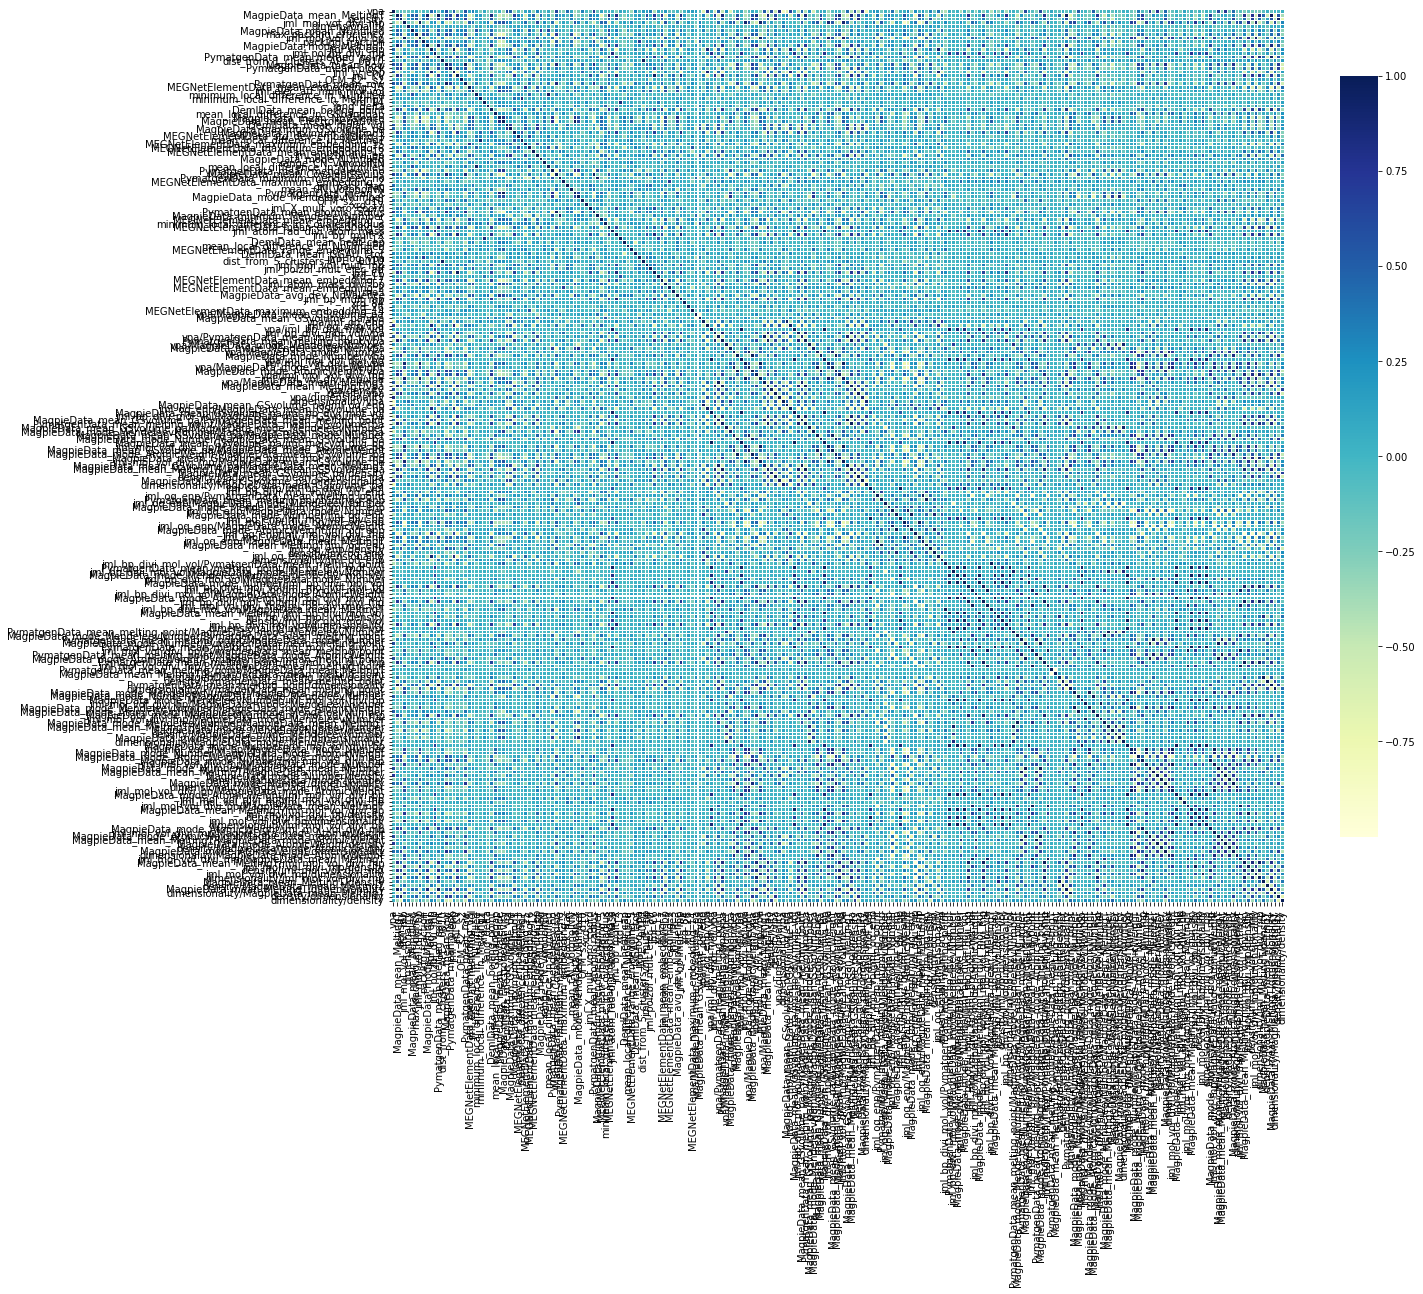

Figure saved as: "correlation_heatmap.png"


In [41]:
data.correlation_heatmap()

In [42]:
# Remove features with correlation coeff greather than the threshold
col_corr = data.correlation_analysis(threshold = 0.9)
new_features = data.apply_correlation_filter()

Identified correlated features
No. of features remaining:  129
Features saved as: features_selected_from_correlation_analysis_log10K_VRH.pkl


Match feature names to their feature numbers

In [43]:
df_list = joblib.load(path_to_save + 'feature_list_for_hierarchical.pkl')
df_list.head()

hierarchical_features feature_number                  features  \
0                       vpa           2165                       vpa   
1  MagpieData_mean_MeltingT            145  MagpieData_mean_MeltingT   
2                   density           2164                   density   
3       jml_mol_vol_divi_mp           2685       jml_mol_vol_divi_mp   
4            dimensionality           2292            dimensionality   

  alternative_feature_name                featurizer           feature_type  
0                      NaN           DensityFeatures     structure - order   
1                      NaN  ElementProperty - Magpie           composition   
2                      NaN           DensityFeatures     structure - order   
3                      NaN                JarvisCFID  structure - composite  
4                      NaN            Dimensionality  structure - symmetry

In [44]:
# Perform hierarchical cluster analysis & create the corresponding dendrogram 
x_list = df_list['feature_number'].tolist()

len(x_list)

129

Figure saved as: Dendrogram_log10K_VRH.png


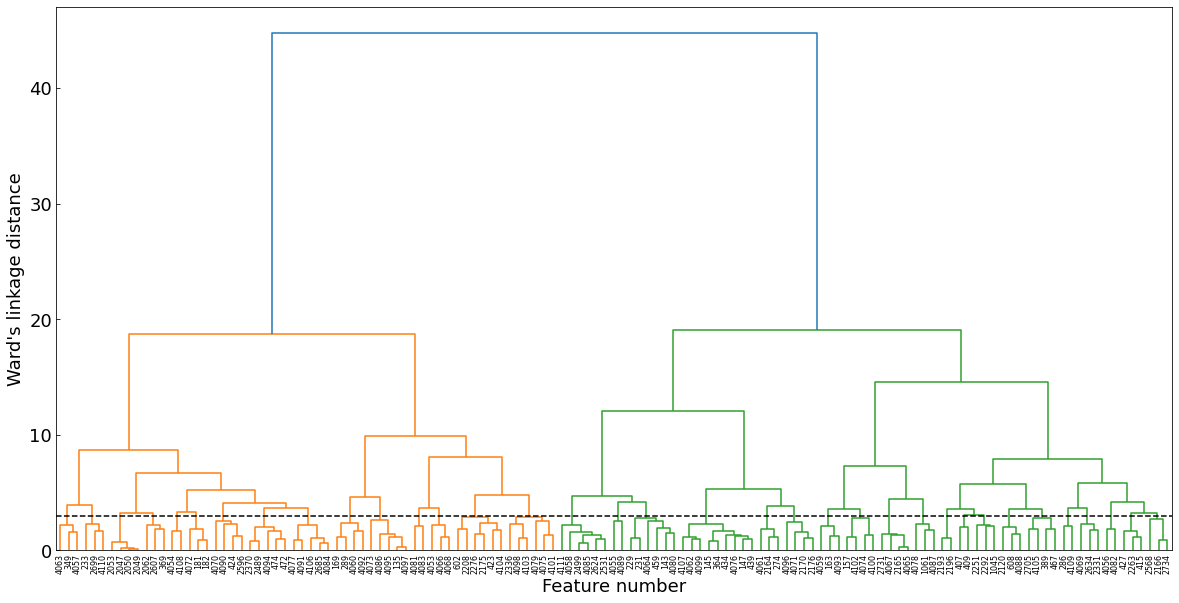

In [45]:
# Perform hierarchical cluster analysis & create the corresponding dendrogram 
x_list = df_list['feature_number'].tolist()

data.hierarchical_cluster_analysis(x_label_in_numbers=True, x_fontsize=7.9, x_list=x_list, horizontal_line=3)

Figure saved as: Dendrogram_log10K_VRH.png


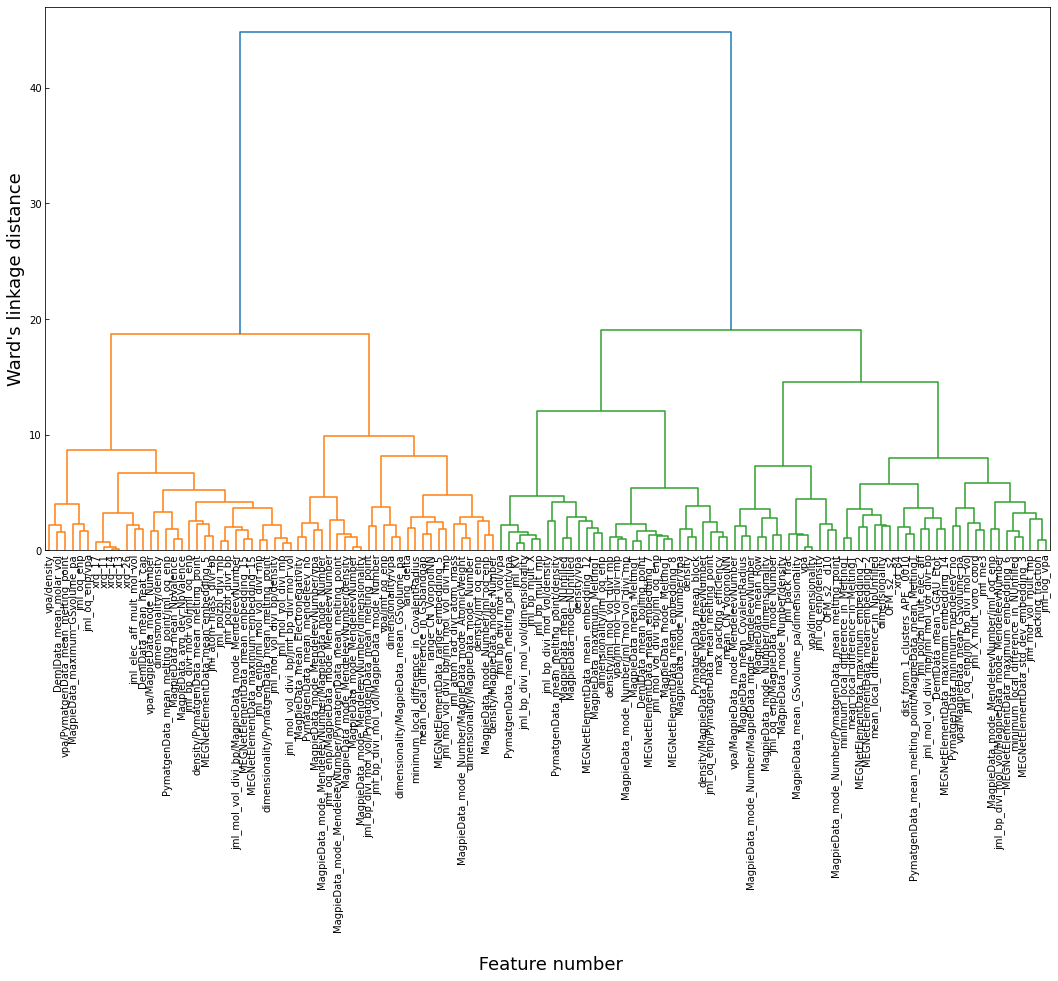

In [46]:
# Perform hierarchical cluster analysis & create the corresponding dendrogram 
data.hierarchical_cluster_analysis(x_label_in_numbers=False)

In [47]:
# Feature being analysed
df = pd.DataFrame({'hierarchical_features':new_features})

# All features
df_features = pd.read_csv('full_feature_list3.csv')

# Merge
df = df.merge(df_features, left_on='hierarchical_features', right_on='features', how='left')
print(len(df))
df.head()

129


hierarchical_features  feature_number                  features  \
0                       vpa            2165                       vpa   
1  MagpieData_mean_MeltingT             145  MagpieData_mean_MeltingT   
2                   density            2164                   density   
3       jml_mol_vol_divi_mp            2685       jml_mol_vol_divi_mp   
4            dimensionality            2292            dimensionality   

  alternative_feature_name                featurizer           feature_type  
0                      NaN           DensityFeatures     structure - order   
1                      NaN  ElementProperty - Magpie           composition   
2                      NaN           DensityFeatures     structure - order   
3                      NaN                JarvisCFID  structure - composite  
4                      NaN            Dimensionality  structure - symmetry

In [48]:
df['feature_number'] = df['feature_number'].astype("string")
df.head()

hierarchical_features feature_number                  features  \
0                       vpa           2165                       vpa   
1  MagpieData_mean_MeltingT            145  MagpieData_mean_MeltingT   
2                   density           2164                   density   
3       jml_mol_vol_divi_mp           2685       jml_mol_vol_divi_mp   
4            dimensionality           2292            dimensionality   

  alternative_feature_name                featurizer           feature_type  
0                      NaN           DensityFeatures     structure - order   
1                      NaN  ElementProperty - Magpie           composition   
2                      NaN           DensityFeatures     structure - order   
3                      NaN                JarvisCFID  structure - composite  
4                      NaN            Dimensionality  structure - symmetry

In [49]:
joblib.dump(df, path_to_save + 'feature_list_for_hierarchical.pkl')

['C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/2. vrh_avg_shear (done)/log10K_VRH_results_backup/feature_list_for_hierarchical.pkl']

In [50]:
df.to_csv(path_to_save + 'feature_list_for_hierarchical.csv')

Vary linkage threshold

In [51]:
# Select features based on the given linkage threshold
threshold_list = [1, 2, 3, 4, 5]

for i in threshold_list:
    final_features = data.apply_linkage_threshold(threshold = i)

Number of features remaining:  113
Features saved as features_selected_from_hierarchical_analysis_log10K_VRH_threshold_1.pkl
Number of features remaining:  66
Features saved as features_selected_from_hierarchical_analysis_log10K_VRH_threshold_2.pkl
Number of features remaining:  35
Features saved as features_selected_from_hierarchical_analysis_log10K_VRH_threshold_3.pkl
Number of features remaining:  23
Features saved as features_selected_from_hierarchical_analysis_log10K_VRH_threshold_4.pkl
Number of features remaining:  16
Features saved as features_selected_from_hierarchical_analysis_log10K_VRH_threshold_5.pkl


#### Permutation importance

In [52]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import permutation_importance as pi

import joblib
import pandas as pd

In [53]:
# Target
target = 'log10K_VRH'

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/2. vrh_avg_shear (done)/'
path_to_save = path + target + '_results_backup/'
path2 = path + target + '_results/'
path_to_file = path2 + 'df_train_' + target + '_engineered.pkl'

# Features 
features = joblib.load(path2 + 'features_selected_from_hierarchical_analysis_' + target + '_threshold_3.pkl')

scaled = False

problem = 'regression'

In [54]:
# Feature name and numbers
f = pd.DataFrame({'feature_before_rfe': features})

df_feature_list = pd.read_csv('full_feature_list3.csv')

df = df.merge(df_feature_list, left_on='feature_before_rfe', right_on='features')
df.head()

feature_before_rfe  feature_number                  features  \
0                       vpa            2165                       vpa   
1  MagpieData_mean_MeltingT             145  MagpieData_mean_MeltingT   
2                   density            2164                   density   
3       jml_mol_vol_divi_mp            2685       jml_mol_vol_divi_mp   
4            dimensionality            2292            dimensionality   

  alternative_feature_name                featurizer           feature_type  
0                      NaN           DensityFeatures     structure - order   
1                      NaN  ElementProperty - Magpie           composition   
2                      NaN           DensityFeatures     structure - order   
3                      NaN                JarvisCFID  structure - composite  
4                      NaN            Dimensionality  structure - symmetry

In [55]:
# Feature number column
x_list = df['feature_number']
len(x_list)

35

In [56]:
# Initialize module with path_to_file and path_to_save
run = pi.permutation_importance_of_features(
                                            path_to_file, 
                                            path_to_save, 
                                            target=target,
                                            features = features,
                                            scaled = scaled,
                                            problem = problem
                                            )

Target: log10K_VRH
No. of features: 35


In [57]:
# Run PI
estimator = run.base_model(boosting_method = 'lightGBM')
results = run.perform(cv_fold=10, save=True)


Saved as C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/2. vrh_avg_shear (done)/log10K_VRH_results_backup/permutation_importance.pkl


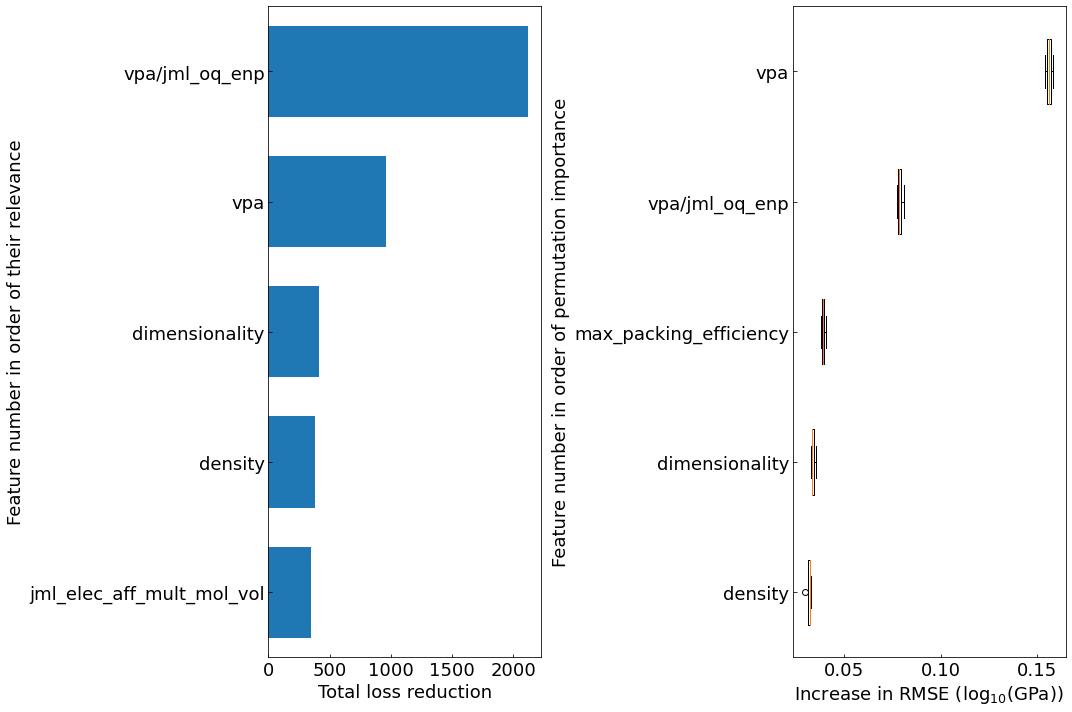

Figure saved as: permutation_importance_plot_log10K_VRH.png


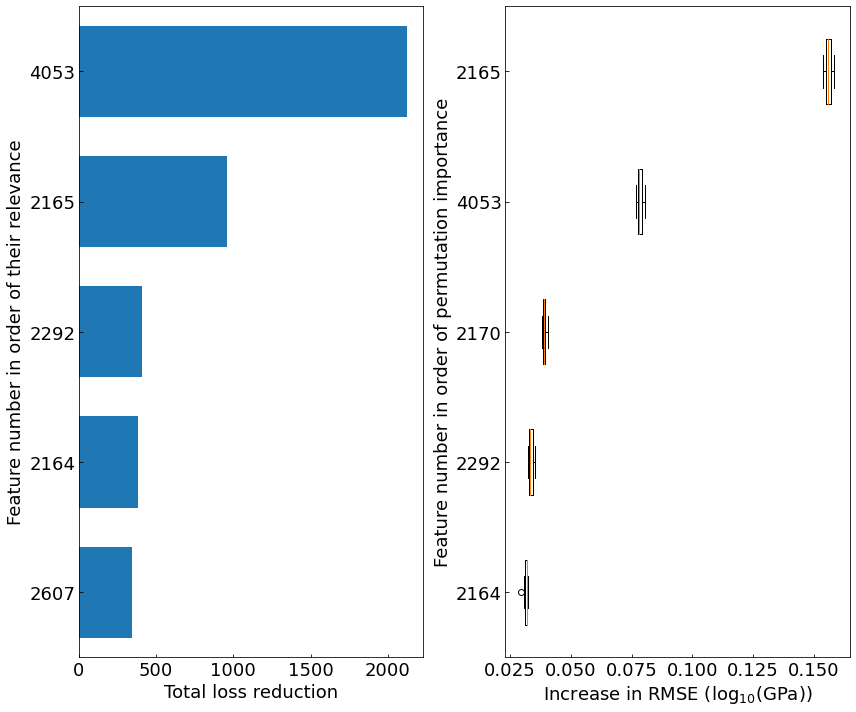

Figure saved as: permutation_importance_plot_log10K_VRH.png


In [58]:
# Get plot
run.plot(top_n=5, x_list=None)
feature_list, permutation_scores = run.plot(top_n=5, x_list=x_list)

#### Recursive Feature Elimination

In [59]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import recursive_feature_elimination as rfe

import joblib
import pandas as pd

In [60]:
# Target
target = 'log10K_VRH'

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/2. vrh_avg_shear (done)/'
path_to_save = path + target + '_results/'
path_to_file = path_to_save + 'df_train_' + target + '_engineered.pkl'

# Features 
features = joblib.load(path_to_save + 'features_selected_from_hierarchical_analysis_' + target + '_threshold_3.pkl')

scaled = False

problem = 'regression'

In [61]:
# Initialize module with path_to_file and path_to_save
run = rfe.recursive_feature_elimination(
                                        path_to_file, 
                                        path_to_save, 
                                        target=target,
                                        features = features,
                                        scaled = False,
                                        problem = problem
                                        )

Target: log10K_VRH
No. of features: 35


In [62]:
# Run RFE
estimator = run.base_model(boosting_method = 'lightGBM')
RFE_features = run.perform()

Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 feat

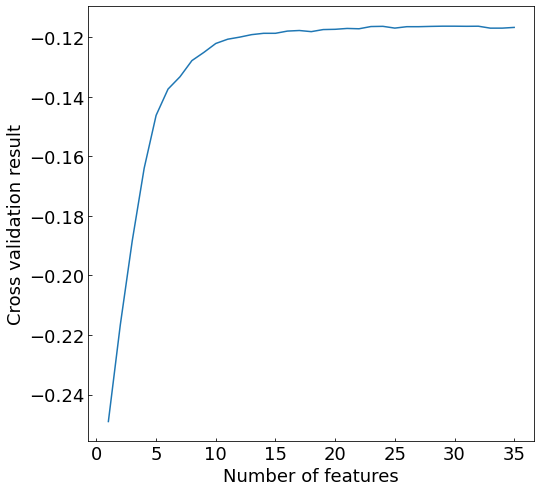

Figure saved as: RFE_plot_log10K_VRH.png


In [63]:
# Plot figure
run.RFE_plot()

Create pretty plot

In [64]:
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/2. vrh_avg_shear (done)/'
path2 = path + target + '_results/'
path_to_save = path + target + '_results_backup/'

selector = joblib.load(path2 + 'RFECV_selector_log10K_VRH.pkl')
#refined_features_4 = joblib.load(path_to_save + 'features_selected_from_RFE_log10K_VRH.pkl')

In [65]:
RFECV_importance = selector.ranking_
RFECV_grid_score = selector.grid_scores_
#RFECV_features = refined_features_4

RFECV_features = pd.DataFrame({#'features': RFECV_features, 
                               'importance_score':RFECV_importance,
                               'grid_scores_':RFECV_grid_score,
                              })
RFECV_features = RFECV_features.sort_values(by='importance_score', ascending=True)
RFECV_features = RFECV_features.reset_index(drop=True)
RFECV_features

importance_score  grid_scores_
0                  1     -0.249064
1                  1     -0.116973
2                  1     -0.116325
3                  1     -0.116353
4                  1     -0.116317
5                  1     -0.116484
6                  1     -0.116957
7                  1     -0.116364
8                  1     -0.116433
9                  1     -0.117182
10                 1     -0.117072
11                 1     -0.117361
12                 1     -0.117449
13                 1     -0.117766
14                 1     -0.117960
15                 1     -0.116725
16                 1     -0.118707
17                 1     -0.119154
18                 1     -0.119989
19                 1     -0.122118
20                 1     -0.125119
21                 1     -0.127867
22                 1     -0.133301
23                 1     -0.118703
24                 1     -0.137431
25                 1     -0.216613
26                 1     -0.188400
27                 1     -0.146251
28                 1     -0.164002
29                 2     -0.120685
30                 3     -0.116967
31                 4     -0.118145
32                 5     -0.116384
33                 6     -0.116314
34                 7     -0.116484

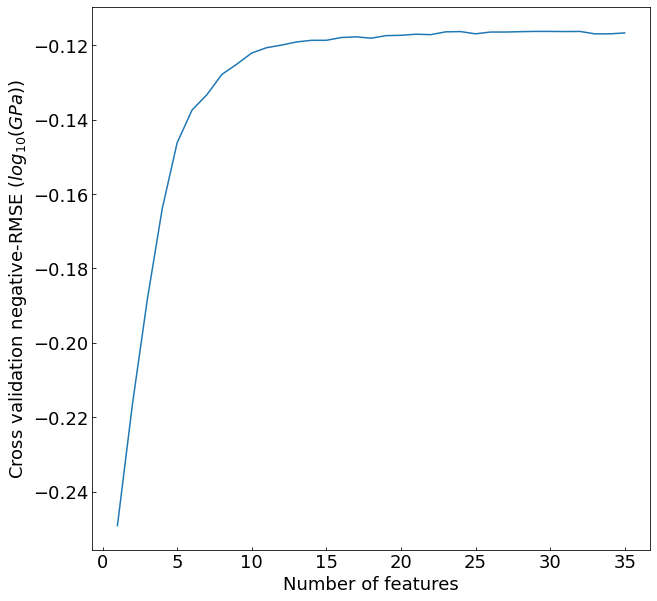

In [66]:
fig, ax = plt.subplots(figsize=(10, 10))

fontsize = 18
# plt.title('(b)', fontsize=fontsize+5, y=1.01) 
plt.xlabel('Number of features', fontsize=fontsize)
plt.ylabel('Cross validation negative-RMSE ($log_{10}(GPa)$)', fontsize=fontsize)
plt.tick_params(axis='both', which='major', labelsize=fontsize, direction='in')
#plt.grid(which = 'major')

min_features_to_select = 1

plt.plot(range(min_features_to_select, len(selector.grid_scores_) + min_features_to_select),
        selector.grid_scores_)

plt.savefig(path_to_save + 'reg_rfe.png', dpi = 300, bbox_inches="tight")
plt.show()

#### Test Dummy Model 
###### (Before optimization)

In [67]:
import pandas as pd
import numpy as np
import joblib
import statsmodels.api as sm
import matplotlib.pyplot as plt

from matplotlib.gridspec import GridSpec
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, max_error
from sklearn.metrics import explained_variance_score,mean_squared_error
from sklearn.preprocessing import MinMaxScaler

from lightgbm.sklearn import LGBMRegressor

In [68]:
# Target
target = 'log10K_VRH'

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/2. vrh_avg_shear (done)/'
path_to_save = path + target + '_results/'
path_to_file = path_to_save + 'df_train_' + target + '_engineered.pkl'

# Data
df_train = joblib.load(path_to_save + 'df_train_' + target + '_engineered.pkl')
df_test = joblib.load(path_to_save + 'df_test_' + target + '_engineered.pkl')

# Features 
features = joblib.load(path_to_save + 'features_selected_from_hierarchical_analysis_' + target + '_threshold_3.pkl')
scaled = False
print('No. of features:', len(features))

problem = 'regression'

No. of features: 35


In [69]:
# Scale the features
scaling = MinMaxScaler(feature_range=(0, 1))

df_train[features] = pd.DataFrame(
                                    scaling.fit_transform(df_train[features].values),
                                    columns=df_train[features].columns,
                                    index=df_train[features].index
                                )
                                

df_test[features] = pd.DataFrame(
                                    scaling.transform(df_test[features].values),
                                    columns=df_test[features].columns,
                                    index=df_test[features].index
                                )

In [70]:
# Train
lgbm = LGBMRegressor(
                    boosting_type ='gbdt',
                    objective='regression',
                    importance_type='gain',
                    learning_rate=0.1,
                    n_estimators=350,
                    num_leaves=40,
                    max_depth=-1,
                    random_state=42
                    )

lgbm.fit(df_train[features], df_train[target].values.ravel())
lgbm

LGBMRegressor(importance_type='gain', n_estimators=350, num_leaves=40,
              objective='regression', random_state=42)

In [71]:
# Predict
predicted_target = lgbm.predict(df_test[features])

# Generate table of results
id_index = df_test.index.tolist()

df_pred = pd.DataFrame({'task_id': id_index,
                        'act_lambda_max': df_test[target].values.reshape(1, -1).ravel(),
                        'pred_lambda_max': predicted_target
                        })
df_pred['adj_pred_lambda_max'] = df_pred['pred_lambda_max']
df_pred['adj_pred_lambda_max'] = df_pred['adj_pred_lambda_max'].apply(lambda x: 0 if x < 0 else x)

# Define variables
y_test = df_pred['act_lambda_max']
y_pred_adj = df_pred['adj_pred_lambda_max']
y_pred = df_pred['pred_lambda_max']

In [72]:
print('Max value:', df_test[target].max())
print('Min value:', df_test[target].min())

Max value: 2.5854607295085006
Min value: 0.0


In [73]:
def plot(df_pred, adj=True):
        # Plot results
        max_value = 3

        X = df_pred['act_lambda_max']
        if adj is True:
                Y = df_pred['adj_pred_lambda_max']
        else:
                Y = df_pred['pred_lambda_max']

        # Stats
        results = sm.OLS(Y,sm.add_constant(X)).fit()
        print(results.summary())

        # Figure
        fig = plt.figure(figsize=(10, 10))
        gs = GridSpec(4, 4)

        ax_scatter = fig.add_subplot(gs[1:4, 0:3])
        ax_hist_y = fig.add_subplot(gs[0,0:3])
        ax_hist_x = fig.add_subplot(gs[1:4, 3])


        fontsize = 18

        # Predicted vs Actual
        ax_scatter.plot(X, Y, 'o', markersize=6, color='black', alpha=0.08)

        # line of best fit
        linear_fit = np.linspace(0, max_value, max_value)
        ax_scatter.plot(linear_fit, linear_fit*results.params[1] + results.params[0], '-.', color='tab:blue', alpha=0.7)

        # Ideal y=x 
        y = x = np.linspace(0, max_value, max_value)
        ax_scatter.plot(x, y, '--', color='red', alpha=0.7)

        ticks = np.linspace(0, max_value, 5)

        ax_scatter.set_xlabel('DFT Calculation of log$_{10}$($K_{VRH}$)', fontsize=fontsize)
        ax_scatter.set_ylabel('ML Prediction of log$_{10}$($K_{VRH}$)', fontsize=fontsize)
        ax_scatter.tick_params(axis='both', which='both', labelsize=fontsize, direction="in")
        ax_scatter.set_xlim(-0.25, max_value+0.25)
        ax_scatter.set_xticks(ticks)
        ax_scatter.set_yticks(ticks)

        ax_hist_x.tick_params(axis='both', which='both', labelsize=fontsize, direction="in", labelleft=False)
        ax_hist_x.set_xlabel('Count', fontsize=fontsize)
        ax_hist_x.set_ylim(-0.135, max_value+0.15)
        ax_hist_x.set_xticks([0, 60, 120])
        ax_hist_x.set_yticks(ticks)

        ax_hist_y.tick_params(axis='both', which='both', labelsize=fontsize, direction="in", labelbottom=False)
        ax_hist_y.set_ylabel('Count', fontsize=fontsize)
        ax_hist_y.set_xlim(-0.25, max_value+0.25)
        ax_hist_y.set_yticks([0, 60, 120])
        ax_hist_y.set_xticks(ticks)

        # Distribution plots
        alpha = 0.4
        histtype = 'bar' #'step' bar
        color = 'black' #'tab:grey'
        bins = 60 #70

        ax_hist_y.hist(
                        y_pred_adj, 
                        bins=bins, 
                        color=color, 
                        histtype=histtype,
                        alpha=alpha
                        )
        ax_hist_x.hist(
                        y_test, 
                        orientation='horizontal', 
                        bins=bins, 
                        color=color, 
                        histtype=histtype,
                        alpha=alpha
                        )


        #Text in figure
        font1 = {'family': 'DejaVu Sans',
                'color':  'red',
                'weight': 'normal',
                'size': fontsize-3,
                }

        font2 = {'family': 'DejaVu Sans',
                'color':  'tab:blue',
                'weight': 'normal',
                'size': fontsize-3,
                }

        font3 = {'family': 'DejaVu Sans', #'serif',
                'color':  'black',
                'weight': 'normal',
                'size': fontsize-3,
                }

        ax_scatter.text(1.85, 2.5, r'$y = x$', fontdict=font1)
        ax_scatter.text(2.3, 1.9, r'$y = ' + str(round(results.params[1],1)) + 'x - ' + str(round(results.params[0],1)) + '$', fontdict=font2)

        r2 = r2_score(X, Y)
        ax_scatter.text(1.6, 0.24, r'$R^{2}$ = ' + str(round(r2,3)), fontdict=font3)

        mae = mean_absolute_error(X, Y)
        ax_scatter.text(1.6, 0.1, r'$MAE$ = ' + str(round(mae,3)) + ' log$_{10}$(GPa)', fontdict=font3)

        mse = mean_squared_error(X, Y, squared=False)
        ax_scatter.text(1.6, -0.05, r'$RMSE$ = ' + str(round(mse,3)) + ' log$_{10}$(GPa)', fontdict=font3)

        #final_figure
        #fig.savefig('final_regression_mag_v1.png', dpi = 500, bbox_inches="tight")

        plt.show()

        print('m = ', results.params[1])
        print('c = ', results.params[0], '\n')

        print('MAE: ', mean_absolute_error(X, Y))
        print('MSE: ', mean_squared_error(X, Y))
        print('RMSE: ', mean_squared_error(X, Y, squared=False))
        print('R-squared: ', r2_score(X, Y))
        print('Max error: ', max_error(X, Y))
        print('Explained_variance_score: ', explained_variance_score(X, Y, multioutput='variance_weighted'))

                            OLS Regression Results                            
Dep. Variable:        pred_lambda_max   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                 2.026e+04
Date:                Sat, 06 Aug 2022   Prob (F-statistic):               0.00
Time:                        11:39:57   Log-Likelihood:                 1676.1
No. Observations:                2198   AIC:                            -3348.
Df Residuals:                    2196   BIC:                            -3337.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1813      0.012     14.

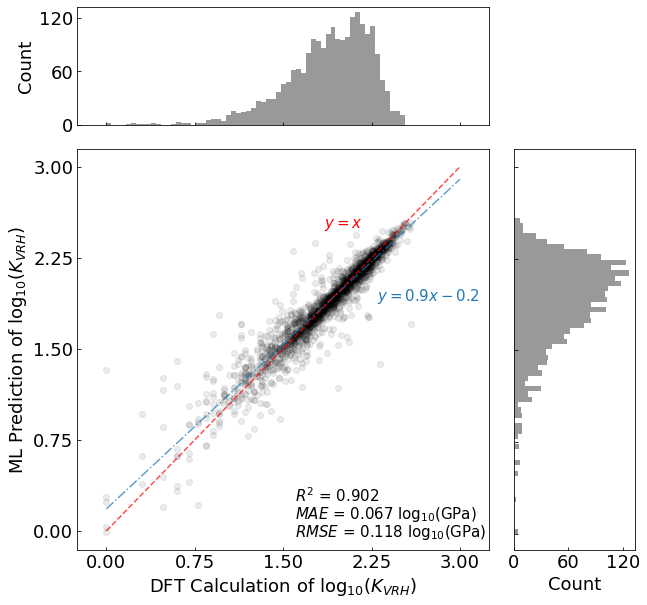

m =  0.9052358536593748
c =  0.1813095258582657 

MAE:  0.06710913047757991
MSE:  0.01403979874386776
RMSE:  0.1184896566957123
R-squared:  0.902128859076268
Max error:  1.321806110396332
Explained_variance_score:  0.9022105466309999


In [74]:
plot(df_pred, adj=False)

[Text(0.5, 0, 'Relevance score'), Text(0, 0.5, 'Feature')]

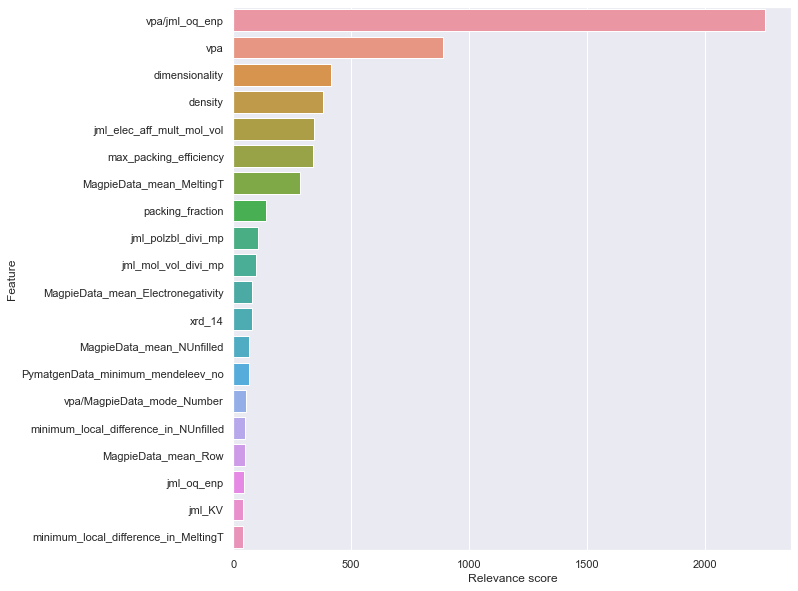

In [75]:
import seaborn as sns

# Generate feature ranking
model = lgbm

feature_score = pd.DataFrame({'feature': features, 'relevance_score': model.feature_importances_})
feature_score = feature_score.sort_values(by = 'relevance_score', ascending = False)
feature_score = feature_score.reset_index(drop = True)


#Plot data of feature relevance 
sns.set(rc = {'figure.figsize':(10, 10)})

# Number of features to plot
no_of_features = 20

fig = sns.barplot(x = 'relevance_score', y = 'feature', data = feature_score[:no_of_features])
fig.set(xlabel = 'Relevance score', ylabel = 'Feature')

#### Test Various Optimization 

Preliminary optimization 

In [76]:
from skopt import forest_minimize, gbrt_minimize, gp_minimize, dummy_minimize
from sklearn.model_selection import cross_val_score
from skopt.utils import use_named_args
from skopt.space import Real, Integer
from skopt import dump, load
from skopt.plots import plot_convergence, plot_objective, plot_evaluations
from skopt import space

import joblib
import pandas as pd
import numpy as np

### test result to find best threshold

import pandas as pd
import numpy as np
import joblib
import statsmodels.api as sm
import matplotlib.pyplot as plt

from matplotlib.gridspec import GridSpec
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, max_error
from sklearn.metrics import explained_variance_score,mean_squared_error
from sklearn.preprocessing import MinMaxScaler

from lightgbm.sklearn import LGBMRegressor

In [77]:
# Target
target = 'log10K_VRH'

# Path
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/2. vrh_avg_shear (done)/'
path_to_save = path + target + '_results/'

# Path to training data
path_to_train_data = path_to_save + 'df_train_' + target + '_engineered.pkl'
path_to_test_data = path_to_save + 'df_test_' + target + '_engineered.pkl'

path_to_features = path_to_save + 'features_selected_from_RFE_' + target + '.pkl' 

problem = 'regression'

scaled = False

In [78]:
# Load data
df_train = joblib.load(path_to_train_data)
df_test = joblib.load(path_to_test_data)

features = joblib.load(path_to_features)

In [79]:
lgbm = LGBMRegressor(
                    boosting_type ='gbdt',
                    objective='regression',
                    importance_type='gain',
                    learning_rate=0.1,
                    n_estimators=350,
                    num_leaves=40,
                    max_depth=-1,
                    random_state=42
                    )

lgbm.fit(df_train[features], df_train[target].values.ravel())
lgbm

LGBMRegressor(importance_type='gain', n_estimators=350, num_leaves=40,
              objective='regression', random_state=42)

In [80]:
estimator = lgbm

space = [
            Real(0.01, 1.0, name='learning_rate', prior='log-uniform'),
            Integer(100, 800, name='n_estimators'),
            Integer(10, 100, name='num_leaves')
            ]

hyperparameters = [
                        'learning_rate',
                        'n_estimators',
                        'num_leaves'
                        ]


@use_named_args(space)
def objective(**params):
    """
    Define the objective function
    """
    # Performance metric to consider
    if problem == 'classification':
        scoring = 'f1_weighted'

    elif problem == 'regression':
        scoring = 'neg_root_mean_squared_error'

    estimator.set_params(**params)
    
    print('\n', params, '\n')
    
    score = -np.mean(cross_val_score(
                                    estimator, 
                                    df_train[features], 
                                    df_train[target], 
                                    cv = 5, 
                                    n_jobs = -1, 
                                    scoring = scoring
                                    )
                    )
    
    print('Score: ', score, '\n')
    return score

In [81]:
def run(minimizer):
    opt = minimizer(objective, space, n_calls=100, random_state=42, verbose = 1)
    return opt

# Random search
dummy_res = run(dummy_minimize)

# Gaussian processes
gp_res_temp = run(gp_minimize)

# Gaussian processes
gbrt_res = run(gbrt_minimize)

# Random forest
fm_res = run(forest_minimize)

Iteration No: 1 started. Evaluating function at random point.

 {'learning_rate': 0.3918194347141743, 'n_estimators': 370, 'num_leaves': 81} 

Score:  0.12622149807035124 

Iteration No: 1 ended. Evaluation done at random point.
Time taken: 4.2848
Function value obtained: 0.1262
Current minimum: 0.1262
Iteration No: 2 started. Evaluating function at random point.

 {'learning_rate': 0.1575132049977973, 'n_estimators': 714, 'num_leaves': 92} 

Score:  0.11848492067763325 

Iteration No: 2 ended. Evaluation done at random point.
Time taken: 5.0884
Function value obtained: 0.1185
Current minimum: 0.1185
Iteration No: 3 started. Evaluating function at random point.

 {'learning_rate': 0.01584710121043909, 'n_estimators': 558, 'num_leaves': 97} 

Score:  0.11494185439301421 

Iteration No: 3 ended. Evaluation done at random point.
Time taken: 5.1080
Function value obtained: 0.1149
Current minimum: 0.1149
Iteration No: 4 started. Evaluating function at random point.

 {'learning_rate': 0.046

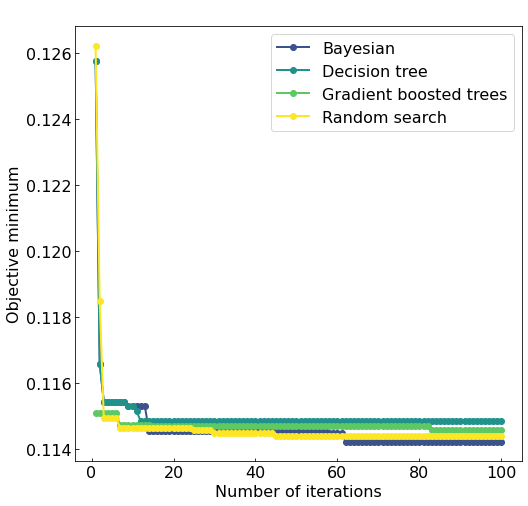

In [82]:
# Setting up the figure
fig, ax = plt.subplots(figsize = (8,8))
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
ax.grid(b = None)

fontsize = 16

plot = plot_convergence(("Bayesian", gp_res_temp),
                        ("Decision tree", fm_res),
                        ("Gradient boosted trees", gbrt_res),
                        ("Random search", dummy_res),
                        #yscale="log"
                        )

plot.legend(loc="best", prop={'size': fontsize}, numpoints=1)
ax.set_title(' ', fontsize = 18)
ax.set_xlabel('Number of iterations', fontsize = fontsize)
ax.set_ylabel('Objective minimum', fontsize = fontsize) 
ax.tick_params(axis='both', which='major', labelsize=fontsize, direction='in')


#final_figure
#fig.savefig(path_to_save + 'Sequential_optimisation_regression.png', dpi = 500, bbox_inches="tight")

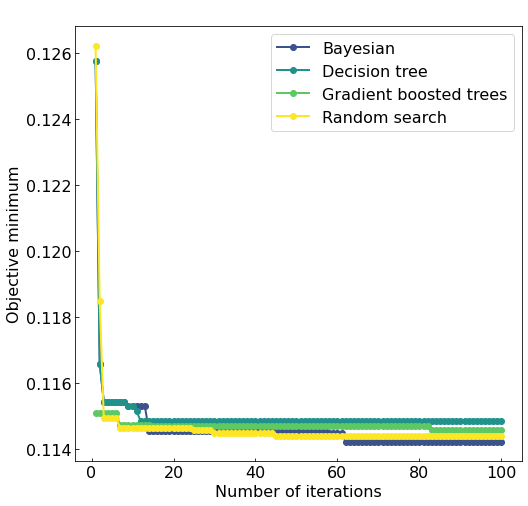

In [83]:
# Setting up the figure
fig, ax = plt.subplots(figsize = (8,8))
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
ax.grid(b = None)

fontsize = 16

plot = plot_convergence(("Bayesian", gp_res_temp),
                        ("Decision tree", fm_res),
                        ("Gradient boosted trees", gbrt_res),
                        ("Random search", dummy_res),
                        #yscale="log"
                        )

plot.legend(loc="best", prop={'size': fontsize}, numpoints=1)
ax.set_title(' ', fontsize = 18)
ax.set_xlabel('Number of iterations', fontsize = fontsize)
ax.set_ylabel('Objective minimum', fontsize = fontsize) 
ax.tick_params(axis='both', which='major', labelsize=fontsize, direction='in')


#final_figure
fig.savefig(path_to_save + 'Sequential_optimisation_regression.png', dpi = 500, bbox_inches="tight")

Bayesian optimization

In [84]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import optimization as opt

import joblib
import pandas as pd
import numpy as np

In [85]:
# Target
target = 'log10K_VRH'

# Path
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/2. vrh_avg_shear (done)/'
path_to_save = path + target + '_results/'

# Path to training data
path_to_train_data = path_to_save + 'df_train_' + target + '_engineered.pkl'
path_to_test_data = path_to_save + 'df_test_' + target + '_engineered.pkl'

path_to_features = path_to_save + 'features_selected_from_RFE_' + target + '.pkl' 

problem = 'regression'

scaled = False

In [86]:
# Initialization
final_stage = opt.optimization(
                            path_to_train_data = path_to_train_data,
                            path_to_test_data = path_to_test_data,
                            path_to_save = path_to_save,
                            features = path_to_features,
                            target = target,
                            problem = problem,
                            scaled = scaled
                            )

Name of target column:  log10K_VRH
No. of exploratory features:  29


In [87]:
# Choose ML model
final_stage.base_model(boosting_method = 'lightGBM')

LGBMRegressor(importance_type='gain', random_state=42)

In [88]:
# Define hyperparameters; range should be edited directly from the script
final_stage.set_hyperparameters()

(['learning_rate', 'n_estimators', 'num_leaves'],
 [Real(low=0.01, high=1.0, prior='log-uniform', transform='identity'),
  Integer(low=100, high=800, prior='uniform', transform='identity'),
  Integer(low=10, high=100, prior='uniform', transform='identity')])

In [89]:
# optimization_method: dummy_minimize, gp_minimize, gbrt_minimize, forest_minimize
final_stage.run(optimization_method = 'bayesian')

Iteration No: 1 started. Evaluating function at random point.

 {'learning_rate': 0.712034142959428, 'n_estimators': 562, 'num_leaves': 95} 

Score:  0.14655652338329656 

Iteration No: 1 ended. Evaluation done at random point.
Time taken: 5.1006
Function value obtained: 0.1466
Current minimum: 0.1466
Iteration No: 2 started. Evaluating function at random point.

 {'learning_rate': 0.1304427037221307, 'n_estimators': 753, 'num_leaves': 19} 

Score:  0.11680011981782079 

Iteration No: 2 ended. Evaluation done at random point.
Time taken: 2.1991
Function value obtained: 0.1168
Current minimum: 0.1168
Iteration No: 3 started. Evaluating function at random point.

 {'learning_rate': 0.016169075347105967, 'n_estimators': 545, 'num_leaves': 37} 

Score:  0.11576313754712708 

Iteration No: 3 ended. Evaluation done at random point.
Time taken: 2.6030
Function value obtained: 0.1158
Current minimum: 0.1158
Iteration No: 4 started. Evaluating function at random point.

 {'learning_rate': 0.028

Saved: Optimisation_result_log10K_VRH.png


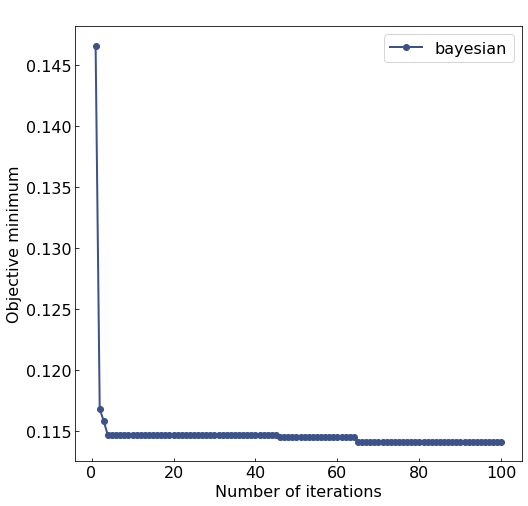

In [90]:
# Plot convergence plot
final_stage.convergence_plot()

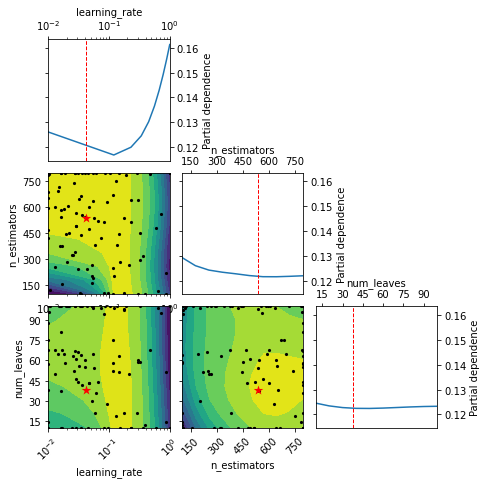

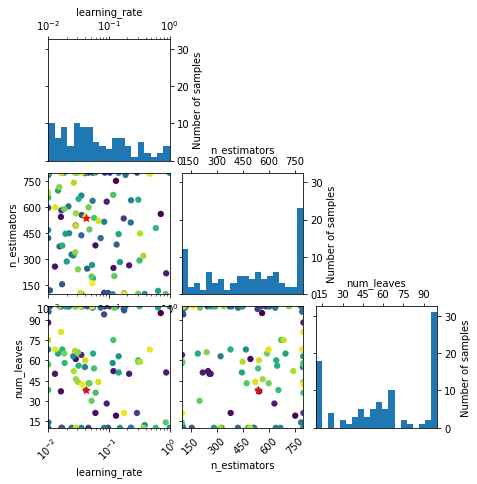

In [91]:
# objective and evaluation plot
final_stage.objective_plot()

In [92]:
# Train model with optimal hyperparameter identified
final_stage.train_model()

LGBMRegressor(importance_type='gain', learning_rate=0.0414730327404853,
              n_estimators=539, num_leaves=38, random_state=42)

                            OLS Regression Results                            
Dep. Variable:            pred_target   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                 2.053e+04
Date:                Tue, 17 May 2022   Prob (F-statistic):               0.00
Time:                        17:41:07   Log-Likelihood:                 1702.3
No. Observations:                2198   AIC:                            -3401.
Df Residuals:                    2196   BIC:                            -3389.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1907      0.012     15.847      0.0

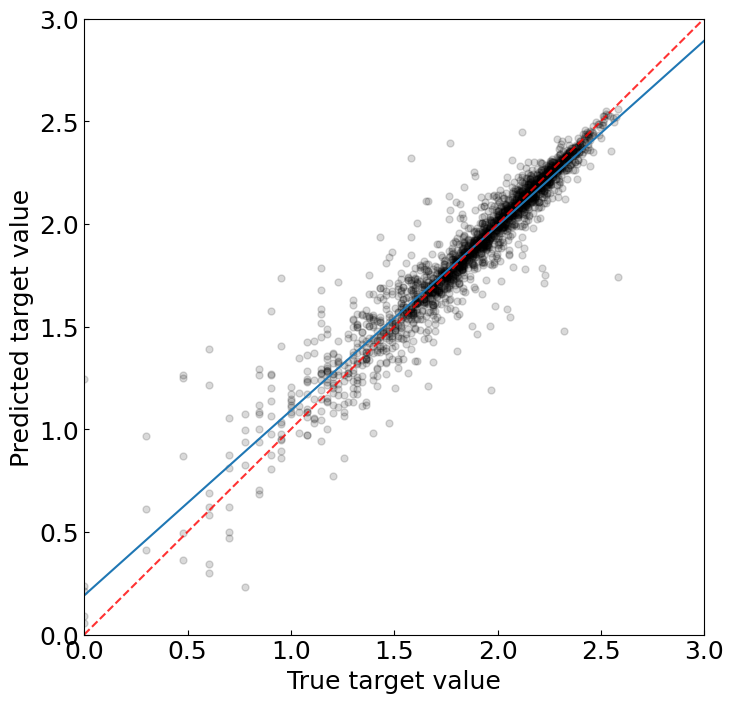

Saved: regression_plot_log10K_VRH.png


In [93]:
# Evaluate model using test set
final_stage.evaluate(
                    strategy = 'weighted', 
                    adjusted = False, 
                    max_value = 3,
                    min_value = 0
                    )


### Final Figure

In [94]:
import pandas as pd
import numpy as np
import joblib
import statsmodels.api as sm
import matplotlib.pyplot as plt

from matplotlib.gridspec import GridSpec
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, max_error
from sklearn.metrics import explained_variance_score,mean_squared_error

from lightgbm.sklearn import LGBMRegressor

In [95]:
# Target
target = 'log10K_VRH'

# Path
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/2. vrh_avg_shear (done)/'
path2 = path + target + '_results/'
path_to_save = path + target + '_results_backup/'

# Features
features = joblib.load(path2 + 'features_selected_from_RFE_' + target + '.pkl')

# Path to training data
df_train = joblib.load(path2 + 'df_train_' + target + '_engineered.pkl')
df_test = joblib.load(path2 + 'df_test_' + target + '_engineered.pkl')

problem = 'regression'

scaled = False

In [96]:
lgbm = LGBMRegressor(
                    boosting_type ='gbdt',
                    objective=problem,
                    importance_type='gain',
                    learning_rate=0.0414730327404853,
                    n_estimators=539,
                    num_leaves=38,
                    max_depth=-1,
                    random_state=42
                    )

lgbm.fit(df_train[features], df_train[target].values.ravel())
lgbm

LGBMRegressor(importance_type='gain', learning_rate=0.0414730327404853,
              n_estimators=539, num_leaves=38, objective='regression',
              random_state=42)

In [97]:
# Predict
predicted_target = lgbm.predict(df_test[features])

# Generate table of results
id_index = df_test.index.tolist()

df_pred = pd.DataFrame({'task_id': id_index,
                        'act_lambda_max': df_test[target].values.reshape(1, -1).ravel(),
                        'pred_lambda_max': predicted_target
                        })

# Eliminate zeros (?)
df_pred['adj_pred_lambda_max'] = df_pred['pred_lambda_max']
df_pred['adj_pred_lambda_max'] = df_pred['adj_pred_lambda_max'].apply(lambda x: 0 if x < 0 else x)

# Define variables
y_test = df_pred['act_lambda_max']
y_pred_adj = df_pred['adj_pred_lambda_max']
y_pred = df_pred['pred_lambda_max']

In [98]:
print('Max value:', df_test[target].max())
print('Min value:', df_test[target].min())

Max value: 2.5854607295085006
Min value: 0.0


In [99]:
def plot(df_pred, adj=True):
        # Plot results
        max_value = 3

        X = df_pred['act_lambda_max']
        if adj is True:
                Y = df_pred['adj_pred_lambda_max']
        else:
                Y = df_pred['pred_lambda_max']

        # Stats
        results = sm.OLS(Y,sm.add_constant(X)).fit()
        print(results.summary())

        # Figure
        fig = plt.figure(figsize=(10, 10)) #, dpi=100, facecolor='w', edgecolor='k')
        gs = GridSpec(4, 4)

        ax_scatter = fig.add_subplot(gs[1:4, 0:3])
        ax_hist_y = fig.add_subplot(gs[0,0:3])
        ax_hist_x = fig.add_subplot(gs[1:4, 3])


        fontsize = 18

        # Predicted vs Actual
        ax_scatter.plot(X, Y, 'o', markersize=6, color='black', alpha=0.08)

        # line of best fit
        linear_fit = np.linspace(0, max_value, max_value)
        ax_scatter.plot(linear_fit, linear_fit*results.params[1] + results.params[0], '-.', color='tab:blue', alpha=0.7)

        # Ideal y=x 
        y = x = np.linspace(0, max_value, max_value)
        ax_scatter.plot(x, y, '--', color='red', alpha=0.7)

        ticks = np.linspace(0, max_value, 5)

        ax_scatter.set_xlabel('DFT Calculation of log$_{10}$($K_{VRH}$)', fontsize=fontsize)
        ax_scatter.set_ylabel('ML Prediction of log$_{10}$($K_{VRH}$)', fontsize=fontsize)
        ax_scatter.tick_params(axis='both', which='both', labelsize=fontsize, direction="in")
        ax_scatter.set_xlim(-0.25, max_value+0.25)
        ax_scatter.set_xticks(ticks)
        ax_scatter.set_yticks(ticks)

        ax_hist_x.tick_params(axis='both', which='both', labelsize=fontsize, direction="in", labelleft=False)
        ax_hist_x.set_xlabel('Count', fontsize=fontsize)
        ax_hist_x.set_ylim(-0.135, max_value+0.15)
        ax_hist_x.set_xticks([0, 60, 120])
        ax_hist_x.set_yticks(ticks)

        ax_hist_y.tick_params(axis='both', which='both', labelsize=fontsize, direction="in", labelbottom=False)
        ax_hist_y.set_ylabel('Count', fontsize=fontsize)
        ax_hist_y.set_xlim(-0.25, max_value+0.25)
        ax_hist_y.set_yticks([0, 60, 120])
        ax_hist_y.set_xticks(ticks)

        # Distribution plots
        alpha = 0.4
        histtype = 'bar' #'step' bar
        color = 'black' #'tab:grey'
        bins = 60 #70

        ax_hist_y.hist(
                        y_pred_adj, 
                        bins=bins, 
                        color=color, 
                        histtype=histtype,
                        alpha=alpha
                        )
        ax_hist_x.hist(
                        y_test, 
                        orientation='horizontal', 
                        bins=bins, 
                        color=color, 
                        histtype=histtype,
                        alpha=alpha
                        )


        #Text in figure
        font1 = {'family': 'DejaVu Sans',
                'color':  'red',
                'weight': 'normal',
                'size': fontsize-3,
                }

        font2 = {'family': 'DejaVu Sans',
                'color':  'tab:blue',
                'weight': 'normal',
                'size': fontsize-3,
                }

        font3 = {'family': 'DejaVu Sans', #'serif',
                'color':  'black',
                'weight': 'normal',
                'size': fontsize-3,
                }

        ax_scatter.text(1.85, 2.5, r'$y = x$', fontdict=font1)
        ax_scatter.text(2.3, 1.9, r'$y = ' + str(round(results.params[1],1)) + 'x - ' + str(round(results.params[0],1)) + '$', fontdict=font2)

        r2 = r2_score(X, Y)
        ax_scatter.text(1.6, 0.24, r'$R^{2}$ = ' + str(round(r2,3)), fontdict=font3)

        mae = mean_absolute_error(X, Y)
        ax_scatter.text(1.6, 0.1, r'$MAE$ = ' + str(round(mae,3)) + ' log$_{10}$(GPa)', fontdict=font3)

        mse = mean_squared_error(X, Y, squared=False)
        ax_scatter.text(1.6, -0.05, r'$RMSE$ = ' + str(round(mse,3)) + ' log$_{10}$(GPa)', fontdict=font3)

        #final_figure
        fig.savefig(path_to_save + 'final_reg_bulk_modulus.png', dpi = 300, bbox_inches="tight")

        plt.show()

        print('m = ', results.params[1])
        print('c = ', results.params[0], '\n')

        print('MAE: ', mean_absolute_error(X, Y))
        print('MSE: ', mean_squared_error(X, Y))
        print('RMSE: ', mean_squared_error(X, Y, squared=False))
        print('R-squared: ', r2_score(X, Y))
        print('Max error: ', max_error(X, Y))
        print('Explained_variance_score: ', explained_variance_score(X, Y, multioutput='variance_weighted'))

                            OLS Regression Results                            
Dep. Variable:        pred_lambda_max   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                 2.021e+04
Date:                Mon, 08 Aug 2022   Prob (F-statistic):               0.00
Time:                        21:53:15   Log-Likelihood:                 1690.1
No. Observations:                2198   AIC:                            -3376.
Df Residuals:                    2196   BIC:                            -3365.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1943      0.012     16.

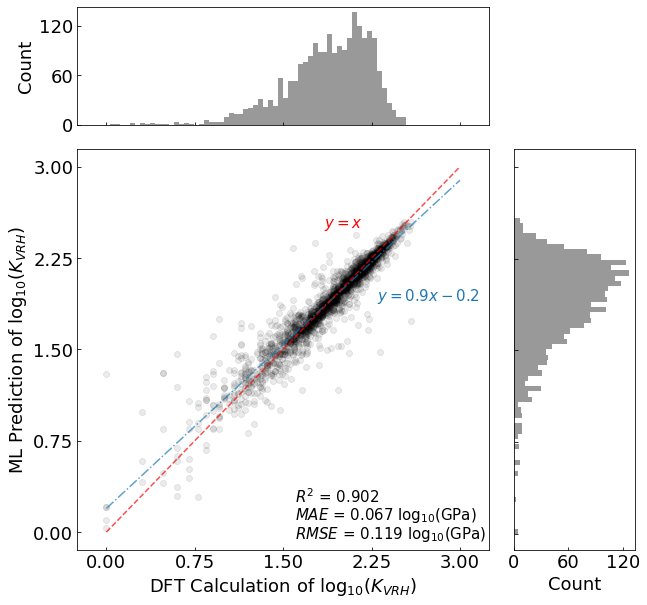

m =  0.8983644312669862
c =  0.19430370851591272 

MAE:  0.06738702539184409
MSE:  0.014073546685224682
RMSE:  0.1186319800274137
R-squared:  0.9018936028888621
Max error:  1.3013634370759397
Explained_variance_score:  0.9019799121116775


In [100]:
plot(df_pred, adj=False)

[Text(0.5, 0, 'Relevance score'), Text(0, 0.5, 'Feature')]

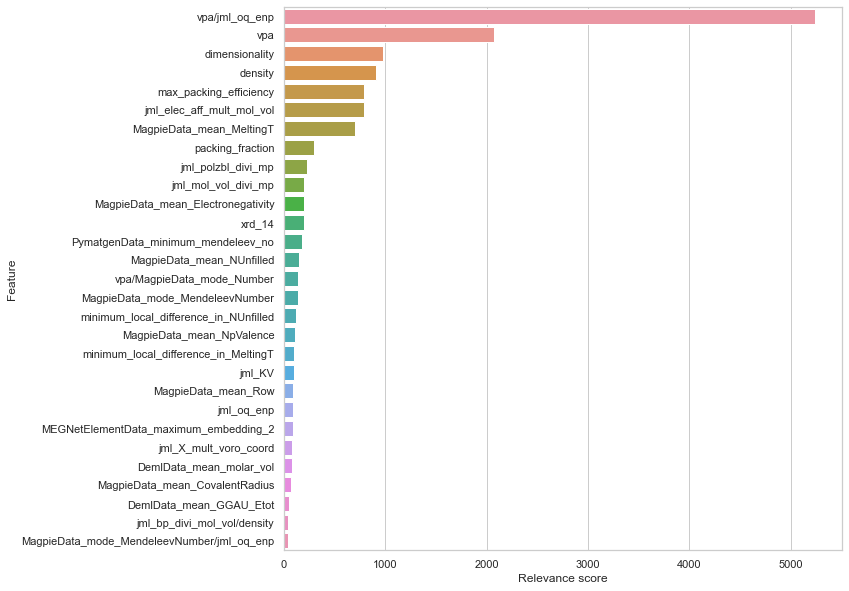

In [101]:
import seaborn as sns

# Generate feature ranking
model = lgbm

feature_score = pd.DataFrame({'feature': features, 'relevance_score': model.feature_importances_})
feature_score = feature_score.sort_values(by = 'relevance_score', ascending = False)
feature_score = feature_score.reset_index(drop = True)

#Plot data of feature relevance 
sns.set(rc = {'figure.figsize':(10, 10)})
sns.set_style("whitegrid")

# Number of features to plot
no_of_features = 30

fig = sns.barplot(x = 'relevance_score', y = 'feature', data = feature_score[:no_of_features])
fig.set(xlabel = 'Relevance score', ylabel = 'Feature')

In [102]:
# All features
df_features = pd.read_csv('full_feature_list3.csv')

# Merge
feature_score = feature_score.merge(df_features, left_on='feature', right_on='features', how='left')
feature_score

feature  relevance_score  \
0                               vpa/jml_oq_enp      5242.049750   
1                                          vpa      2071.964719   
2                               dimensionality       976.740672   
3                                      density       910.876208   
4                       max_packing_efficiency       788.931142   
5                    jml_elec_aff_mult_mol_vol       788.237019   
6                     MagpieData_mean_MeltingT       699.497861   
7                             packing_fraction       295.448495   
8                           jml_polzbl_divi_mp       227.292672   
9                          jml_mol_vol_divi_mp       203.014619   
10           MagpieData_mean_Electronegativity       197.447161   
11                                      xrd_14       196.031895   
12           PymatgenData_minimum_mendeleev_no       175.870611   
13                   MagpieData_mean_NUnfilled       149.195872   
14                  vpa/MagpieData_mode_Number       144.164950   
15             MagpieData_mode_MendeleevNumber       143.035667   
16       minimum_local_difference_in_NUnfilled       121.808397   
17                   MagpieData_mean_NpValence       106.851396   
18        minimum_local_difference_in_MeltingT       100.033043   
19                                      jml_KV        95.688134   
20                         MagpieData_mean_Row        91.233396   
21                                  jml_oq_enp        90.348908   
22       MEGNetElementData_maximum_embedding_2        86.522176   
23                       jml_X_mult_voro_coord        83.060597   
24                     DemlData_mean_molar_vol        79.830749   
25              MagpieData_mean_CovalentRadius        73.609762   
26                     DemlData_mean_GGAU_Etot        47.257904   
27                 jml_bp_divi_mol_vol/density        42.994228   
28  MagpieData_mode_MendeleevNumber/jml_oq_enp        42.051628   

    feature_number                                    features  \
0             4053                              vpa/jml_oq_enp   
1             2165                                         vpa   
2             2292                              dimensionality   
3             2164                                     density   
4             2170                      max_packing_efficiency   
5             2607                   jml_elec_aff_mult_mol_vol   
6              145                    MagpieData_mean_MeltingT   
7             2166                            packing_fraction   
8             2370                          jml_polzbl_divi_mp   
9             2685                         jml_mol_vol_divi_mp   
10             169           MagpieData_mean_Electronegativity   
11            2050                                      xrd_14   
12             286           PymatgenData_minimum_mendeleev_no   
13             229                   MagpieData_mean_NUnfilled   
14            4054                  vpa/MagpieData_mode_Number   
15             135             MagpieData_mode_MendeleevNumber   
16            2263       minimum_local_difference_in_NUnfilled   
17             181                   MagpieData_mean_NpValence   
18            2193        minimum_local_difference_in_MeltingT   
19            2499                                      jml_KV   
20             157                         MagpieData_mean_Row   
21            2699                                  jml_oq_enp   
22             407       MEGNetElementData_maximum_embedding_2   
23            2634                       jml_X_mult_voro_coord   
24             349                     DemlData_mean_molar_vol   
25             163              MagpieData_mean_CovalentRadius   
26             389                     DemlData_mean_GGAU_Etot   
27            4055                 jml_bp_divi_mol_vol/density   
28            4056  MagpieData_mode_MendeleevNumber/jml_oq_enp   

                             alternative_featur

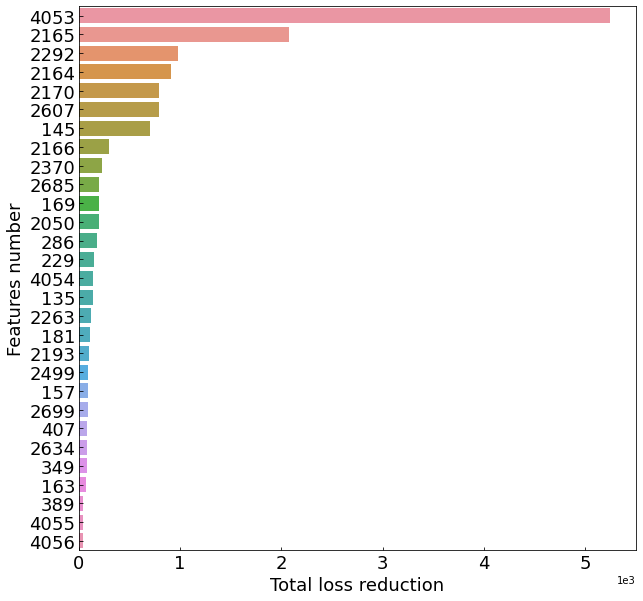

In [103]:
import seaborn as sns

plt.figure(figsize=(8.7, 8.3))

feature_score['feature_number'] = feature_score['feature_number'].astype("string")

fontsize = 18
labelsize = 18
    
sns.barplot(x="relevance_score", y="feature_number", data=feature_score)
plt.tight_layout()
plt.xlabel('Total loss reduction', fontsize=fontsize)
plt.ylabel('Features number', fontsize=fontsize)
plt.tick_params(axis='y', which='major', labelsize=labelsize, direction='in')
plt.tick_params(axis='x', which='major', labelsize=fontsize, direction='in')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0) )

plt.savefig(path_to_save + 'reg_feature_selected.png', dpi = 300, bbox_inches="tight")
plt.show()

### Error Distributions

In [104]:
df_pred

task_id  act_lambda_max  pred_lambda_max  adj_pred_lambda_max
0         107        1.477121         1.483347             1.483347
1        9775        1.963788         1.825033             1.825033
2        3424        2.307496         2.244089             2.244089
3        7945        1.301030         1.311705             1.311705
4        6054        2.235528         2.241504             2.241504
...       ...             ...              ...                  ...
2193    10536        1.949390         1.882789             1.882789
2194     5800        2.240549         2.242589             2.242589
2195     2492        2.492760         2.485266             2.485266
2196     6507        2.184691         2.147772             2.147772
2197    10742        1.612784         1.584361             1.584361

[2198 rows x 4 columns]

In [105]:
col_1 = 'act_lambda_max' 
col_2 = 'adj_pred_lambda_max'

df_pred['rmse'] = df_pred.apply(lambda x: mean_squared_error([x[col_1]], [x[col_2]], squared=False), axis=1)
df_pred['mse'] = df_pred.apply(lambda x: mean_squared_error([x[col_1]], [x[col_2]]), axis=1)
df_pred['mae'] = df_pred.apply(lambda x: mean_absolute_error([x[col_1]], [x[col_2]]), axis=1)

df = df_pred.copy()


MSE:  0.014073546685224682
RMSE:  0.1186319800274137
MAE:  0.06738702539184409


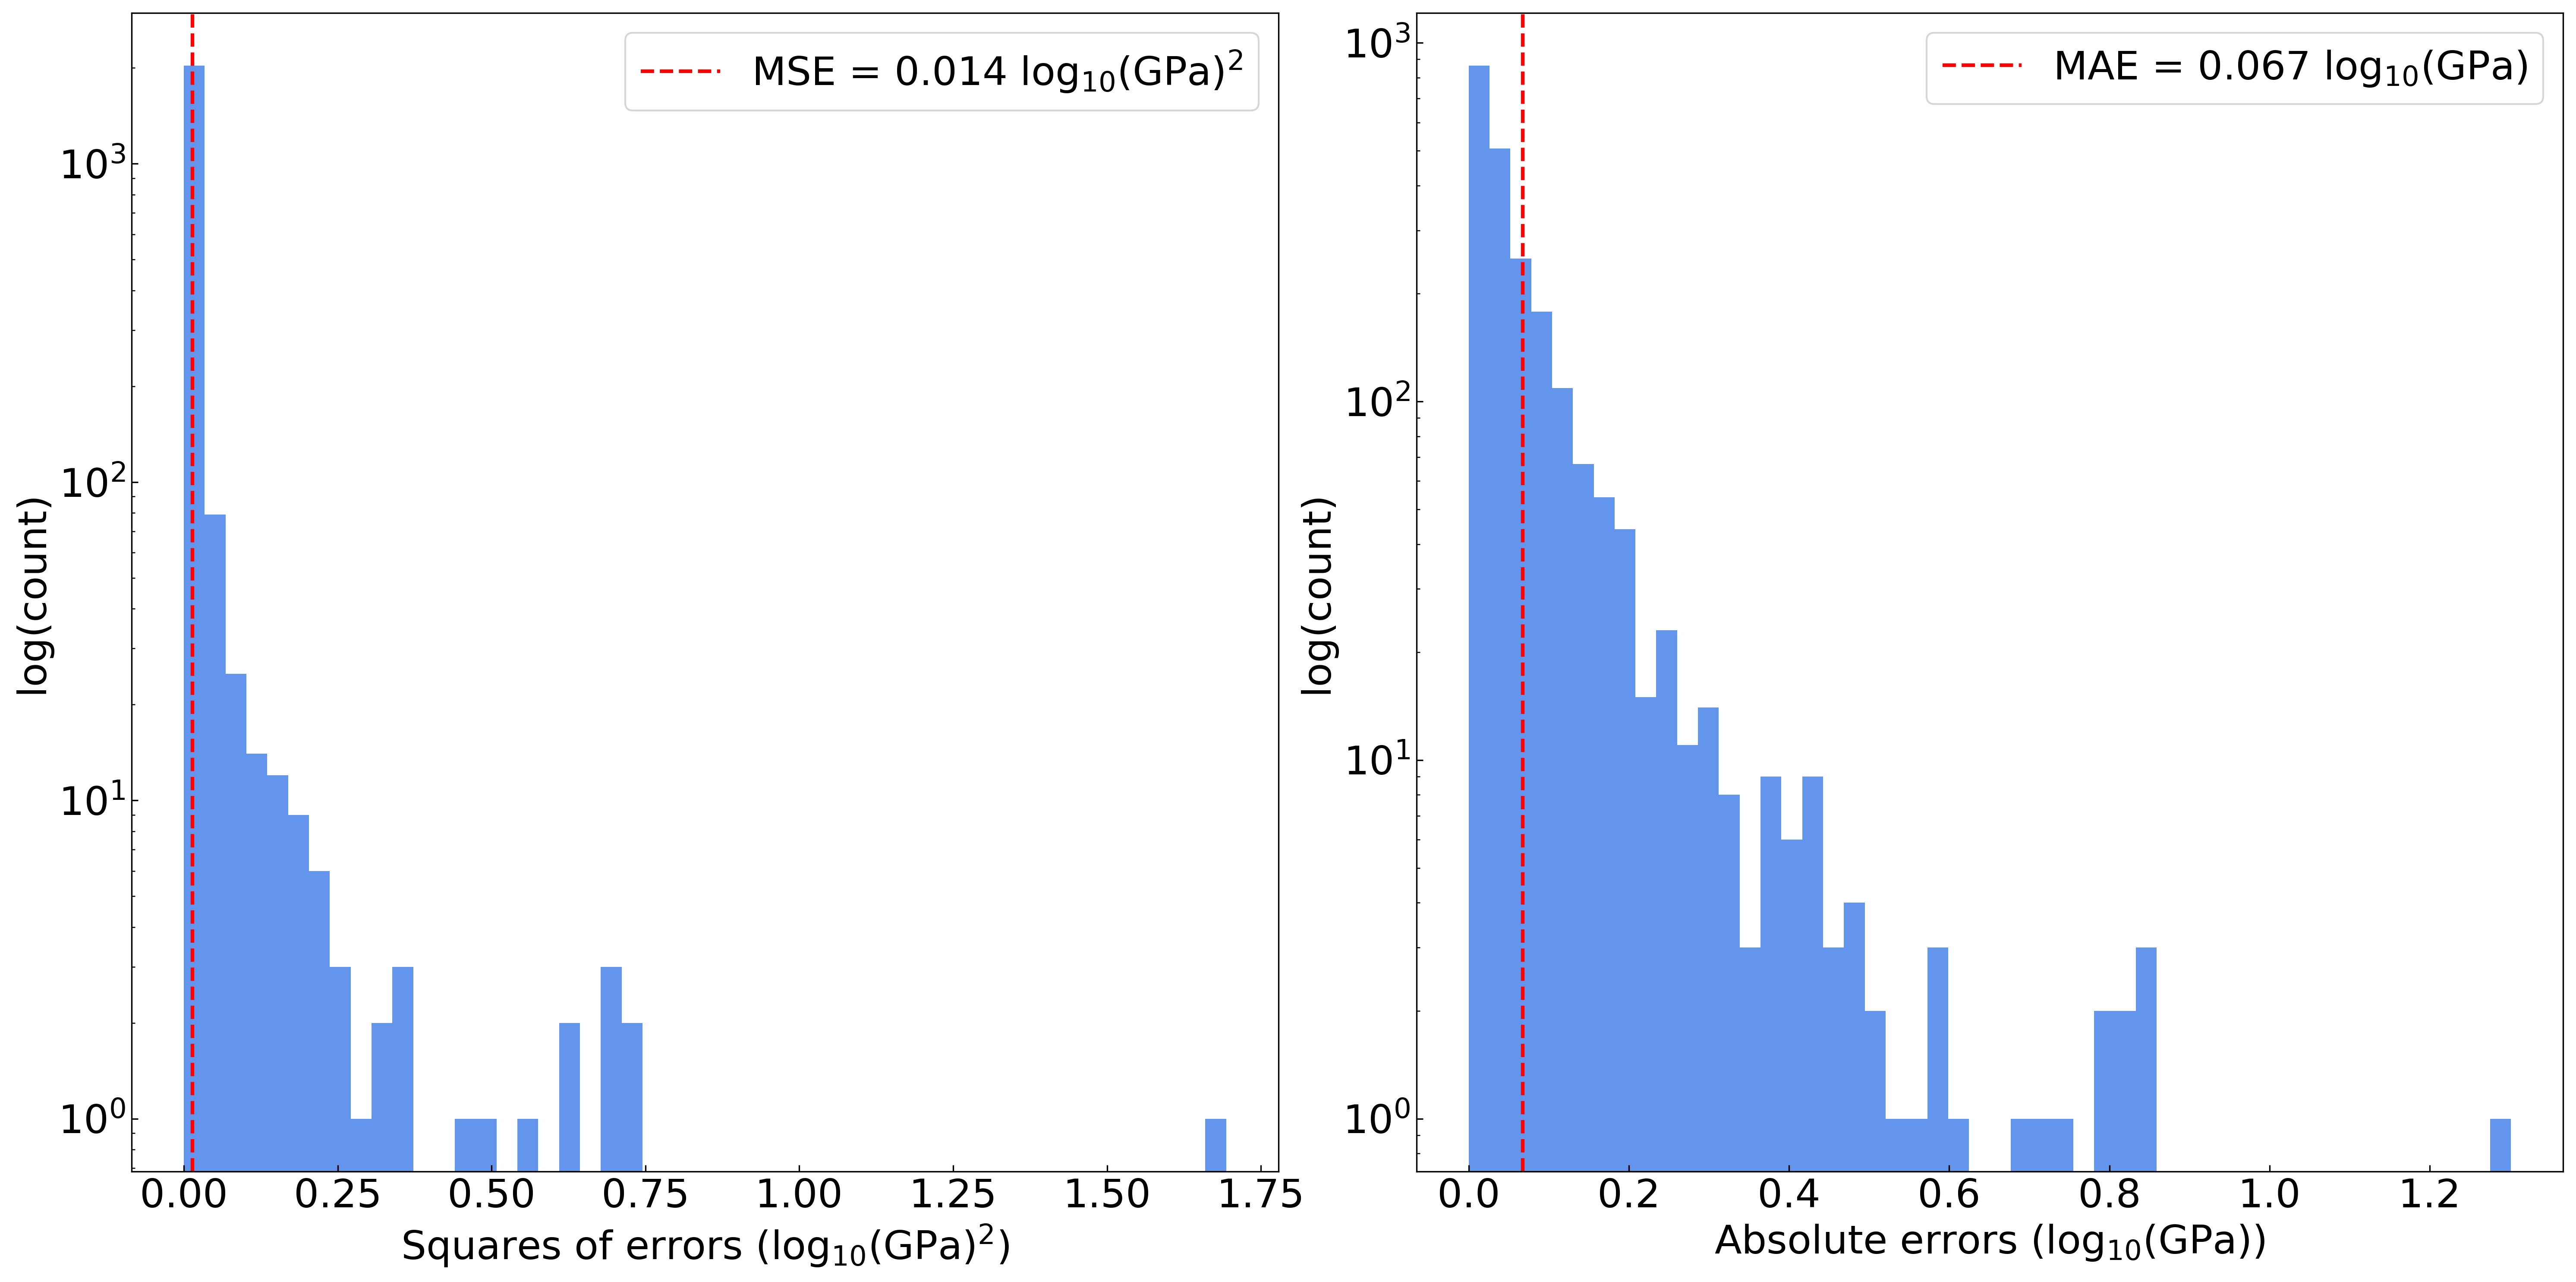

In [106]:
bins = 50

fig, (ax0, ax2) = plt.subplots(ncols=2, figsize=(20, 10), dpi=300)

fontsize = 22
labelsize = 22

ax0.set_xlabel(r"Squares of errors ($\rm{log_{10}(GPa)}^{2}$)", fontsize=fontsize)
ax0.set_ylabel("log(count)", fontsize=fontsize)
ax0.tick_params(axis='both', which='both', labelsize=fontsize, direction='in')
ax0.axvline(mean_squared_error(df[col_1], df[col_2], squared=True), color='r', linestyle='dashed', linewidth=2)
_ = df["mse"].hist(bins=bins, log=True, ax=ax0, color = 'cornflowerblue')

ax0.legend([r'MSE = 0.014 $\rm{log_{10}(GPa)}^{2}$'], fontsize=fontsize)
ax0.grid(False)
print('MSE: ', mean_squared_error(df[col_1], df[col_2]))
print('RMSE: ', mean_squared_error(df[col_1], df[col_2], squared=False))

ax2.set_xlabel(r"Absolute errors ($\rm{log_{10}(GPa)}$)", fontsize=fontsize)
ax2.set_ylabel("log(count)", fontsize=fontsize)
ax2.tick_params(axis='both', which='both', labelsize=fontsize, direction='in')
ax2.axvline(mean_absolute_error(df[col_1], df[col_2]), color='r', linestyle='dashed', linewidth=2)
_ = df["mae"].hist(bins=bins, log=True, ax=ax2, color = 'cornflowerblue')

ax2.legend([r'MAE = 0.067 $\rm{log_{10}(GPa)}$'], fontsize=fontsize)
ax2.grid(False)
print('MAE: ', mean_absolute_error(df[col_1], df[col_2]))

fig.tight_layout()
fig.savefig(path_to_save + 'error_bars_regression_v6.png', dpi = 500, bbox_inches="tight")

#### SHAP

In [107]:
from lightgbm.sklearn import LGBMRegressor
from matplotlib.pyplot import figure
from matplotlib import pyplot as plt

import shap 
# https://shap.readthedocs.io/en/latest/example_notebooks/api_examples/explainers/Exact.html?highlight=clustering_cutoff#id1

In [108]:
# Get feature number
df_final_features = feature_score

# All features
df_all = pd.read_csv('full_feature_list3.csv')

# Merge
df = df_final_features.merge(df_all, left_on='feature', right_on='features')
print(len(df))

df

29


feature  relevance_score  \
0                               vpa/jml_oq_enp      5242.049750   
1                                          vpa      2071.964719   
2                               dimensionality       976.740672   
3                                      density       910.876208   
4                       max_packing_efficiency       788.931142   
5                    jml_elec_aff_mult_mol_vol       788.237019   
6                     MagpieData_mean_MeltingT       699.497861   
7                             packing_fraction       295.448495   
8                           jml_polzbl_divi_mp       227.292672   
9                          jml_mol_vol_divi_mp       203.014619   
10           MagpieData_mean_Electronegativity       197.447161   
11                                      xrd_14       196.031895   
12           PymatgenData_minimum_mendeleev_no       175.870611   
13                   MagpieData_mean_NUnfilled       149.195872   
14                  vpa/MagpieData_mode_Number       144.164950   
15             MagpieData_mode_MendeleevNumber       143.035667   
16       minimum_local_difference_in_NUnfilled       121.808397   
17                   MagpieData_mean_NpValence       106.851396   
18        minimum_local_difference_in_MeltingT       100.033043   
19                                      jml_KV        95.688134   
20                         MagpieData_mean_Row        91.233396   
21                                  jml_oq_enp        90.348908   
22       MEGNetElementData_maximum_embedding_2        86.522176   
23                       jml_X_mult_voro_coord        83.060597   
24                     DemlData_mean_molar_vol        79.830749   
25              MagpieData_mean_CovalentRadius        73.609762   
26                     DemlData_mean_GGAU_Etot        47.257904   
27                 jml_bp_divi_mol_vol/density        42.994228   
28  MagpieData_mode_MendeleevNumber/jml_oq_enp        42.051628   

    feature_number                                    features  \
0             4053                              vpa/jml_oq_enp   
1             2165                                         vpa   
2             2292                              dimensionality   
3             2164                                     density   
4             2170                      max_packing_efficiency   
5             2607                   jml_elec_aff_mult_mol_vol   
6              145                    MagpieData_mean_MeltingT   
7             2166                            packing_fraction   
8             2370                          jml_polzbl_divi_mp   
9             2685                         jml_mol_vol_divi_mp   
10             169           MagpieData_mean_Electronegativity   
11            2050                                      xrd_14   
12             286           PymatgenData_minimum_mendeleev_no   
13             229                   MagpieData_mean_NUnfilled   
14            4054                  vpa/MagpieData_mode_Number   
15             135             MagpieData_mode_MendeleevNumber   
16            2263       minimum_local_difference_in_NUnfilled   
17             181                   MagpieData_mean_NpValence   
18            2193        minimum_local_difference_in_MeltingT   
19            2499                                      jml_KV   
20             157                         MagpieData_mean_Row   
21            2699                                  jml_oq_enp   
22             407       MEGNetElementData_maximum_embedding_2   
23            2634                       jml_X_mult_voro_coord   
24             349                     DemlData_mean_molar_vol   
25             163              MagpieData_mean_CovalentRadius   
26             389                     DemlData_mean_GGAU_Etot   
27            4055                 jml_bp_divi_mol_vol/density   
28            4056  MagpieData_mode_MendeleevNumber/jml_oq_enp   

                             alternative_featur

In [109]:
# Data with feature name
X = df_train[features]
X = X[df['feature'].to_list()]
X

vpa/jml_oq_enp        vpa  dimensionality    density  \
5846       -2.436855  13.726609               3   7.881918   
5079       -2.707045  20.363074               3   9.641542   
8672       -3.647694  20.496807               2   5.506038   
292        -1.096542   9.713804               3   6.723826   
3455       -2.078880  16.104907               3   6.386495   
...              ...        ...             ...        ...   
5734       -1.683381  16.531071               3  15.144155   
5191        0.000000  23.281670               3  10.019631   
5390       -4.145921  18.537924               3   6.365747   
860        -3.943016  20.128904               3   7.631080   
7270       -8.889968  31.270591               3   8.457986   

      max_packing_efficiency  jml_elec_aff_mult_mol_vol  \
5846                0.680167                   5.883907   
5079                0.680168                   9.277613   
8672                0.515162                  14.979757   
292                 0.384784                   2.798345   
3455                0.537165                  10.789515   
...                      ...                        ...   
5734                0.680167                   3.348917   
5191                0.680163                   0.000000   
5390                0.489448                   5.352324   
860                 0.514301                   9.065373   
7270                0.740480                   6.800620   

      MagpieData_mean_MeltingT  packing_fraction  jml_polzbl_divi_mp  \
5846               1717.172500          0.817319            0.021668   
5079               2143.500000          0.852892            0.006412   
8672                989.117500          0.448194            0.011877   
292                1474.350000          0.828320            0.011384   
3455               1533.650000          0.526512            0.008575   
...                        ...               ...                 ...   
5734               2532.250000          0.784793            0.004558   
5191               1104.632500          0.768446            0.000000   
5390               1353.200000          0.721371            0.010843   
860                1072.116667          0.698907            0.013927   
7270               1114.750000          0.865801            0.018647   

      jml_mol_vol_divi_mp  ...      jml_KV  MagpieData_mean_Row  jml_oq_enp  \
5846             0.012627  ...  129.966667             4.000000   -5.632920   
5079             0.005954  ...  216.822333             5.250000   -7.522252   
8672             0.026866  ...   78.078000             4.000000   -5.619113   
292              0.109033  ...  133.316500             3.333333   -8.858579   
3455             0.028789  ...  108.339000             4.000000   -7.746915   
...                   ...  ...         ...                  ...         ...   
5734             0.003942  ...  233.459333             5.500000   -9.820163   
5191             0.000000  ...    0.000000             5.250000    0.000000   
5390             0.015992  ...   93.614667             4.200000   -4.471364   
860              0.025898  ...   87.381667             4.666667   -5.104951   
7270             0.022860  ...   33.244500             6.000000   -3.517514   

      MEGNetElementData_maximum_embedding_2  jml_X_mult_voro_coord  \
5846                               0.179496              17.006667   
5079                              -0.140810              22.393333   
8672                               0.221368              14.706667   
292                                0.548863              12.860000   
3455                               0.221368              13.475000   
...                                     ...                    ...   
5734                               0.463157              19.366667   
5191                               0.366542               0.000000   
5390                               0.334700              14.953333   
860                                0.1

In [110]:
# Data with feature number
frame = df['feature_number'].to_list()
f_number = [str(i) for i in frame]

X.columns = f_number
X

4053       2165  2292       2164      2170       2607          145  \
5846 -2.436855  13.726609     3   7.881918  0.680167   5.883907  1717.172500   
5079 -2.707045  20.363074     3   9.641542  0.680168   9.277613  2143.500000   
8672 -3.647694  20.496807     2   5.506038  0.515162  14.979757   989.117500   
292  -1.096542   9.713804     3   6.723826  0.384784   2.798345  1474.350000   
3455 -2.078880  16.104907     3   6.386495  0.537165  10.789515  1533.650000   
...        ...        ...   ...        ...       ...        ...          ...   
5734 -1.683381  16.531071     3  15.144155  0.680167   3.348917  2532.250000   
5191  0.000000  23.281670     3  10.019631  0.680163   0.000000  1104.632500   
5390 -4.145921  18.537924     3   6.365747  0.489448   5.352324  1353.200000   
860  -3.943016  20.128904     3   7.631080  0.514301   9.065373  1072.116667   
7270 -8.889968  31.270591     3   8.457986  0.740480   6.800620  1114.750000   

          2166      2370      2685  ...        2499       157      2699  \
5846  0.817319  0.021668  0.012627  ...  129.966667  4.000000 -5.632920   
5079  0.852892  0.006412  0.005954  ...  216.822333  5.250000 -7.522252   
8672  0.448194  0.011877  0.026866  ...   78.078000  4.000000 -5.619113   
292   0.828320  0.011384  0.109033  ...  133.316500  3.333333 -8.858579   
3455  0.526512  0.008575  0.028789  ...  108.339000  4.000000 -7.746915   
...        ...       ...       ...  ...         ...       ...       ...   
5734  0.784793  0.004558  0.003942  ...  233.459333  5.500000 -9.820163   
5191  0.768446  0.000000  0.000000  ...    0.000000  5.250000  0.000000   
5390  0.721371  0.010843  0.015992  ...   93.614667  4.200000 -4.471364   
860   0.698907  0.013927  0.025898  ...   87.381667  4.666667 -5.104951   
7270  0.865801  0.018647  0.022860  ...   33.244500  6.000000 -3.517514   

           407       2634        349         163     389       4055       4056  
5846  0.179496  17.006667  10.055000  143.000000 -3.9725  39.662658 -10.474142  
5079 -0.140810  22.393333  14.140000  165.750000 -5.2400  41.920228  -1.595267  
8672  0.221368  14.706667  14.412500  129.000000 -4.4700  39.851362 -15.660834  
292   0.548863  12.860000   9.333333  116.333333 -7.6300  30.704669  -5.531361  
3455  0.221368  13.475000  13.925000  135.500000 -6.0000  38.797898  -6.066931  
...        ...        ...        ...         ...     ...        ...        ...  
5734  0.463157  19.366667  10.597500  156.500000  0.0000  31.530336  -4.582409  
5191  0.366542   0.000000  16.107500  159.250000  0.0000   0.000000   0.000000  
5390  0.334700  14.953333  14.636000  137.000000 -4.0560  31.261943 -12.971433  
860   0.145166  16.930000  15.423333  150.000000  0.0000  25.594647  -2.938324  
7270  0.303153  14.940000  19.747500  187.000000  0.0000  15.678148  -5.401541  

[8789 rows x 29 columns]

In [111]:
# Train
problem = 'regression'

lgbm = LGBMRegressor(
                    boosting_type ='gbdt',
                    objective=problem,
                    importance_type='gain',
                    learning_rate=0.0414730327404853,
                    n_estimators=539,
                    num_leaves=38,
                    max_depth=-1,
                    random_state=42
                    )

# lgbm.fit(X, df_train[target].values.ravel())
lgbm.fit(df_train[features], df_train[target].values.ravel())
lgbm

LGBMRegressor(importance_type='gain', learning_rate=0.0414730327404853,
              n_estimators=539, num_leaves=38, objective='regression',
              random_state=42)

In [112]:
# SHAP
explainer = shap.Explainer(lgbm)

#shap_values = explainer(X)
shap_values = explainer(df_train[features])

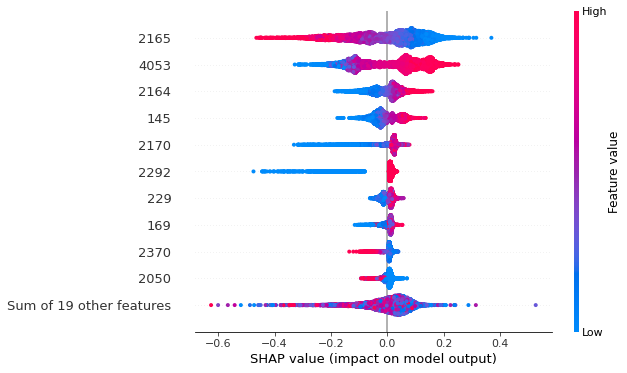

In [113]:
shap.plots.beeswarm(shap_values, max_display=11) 


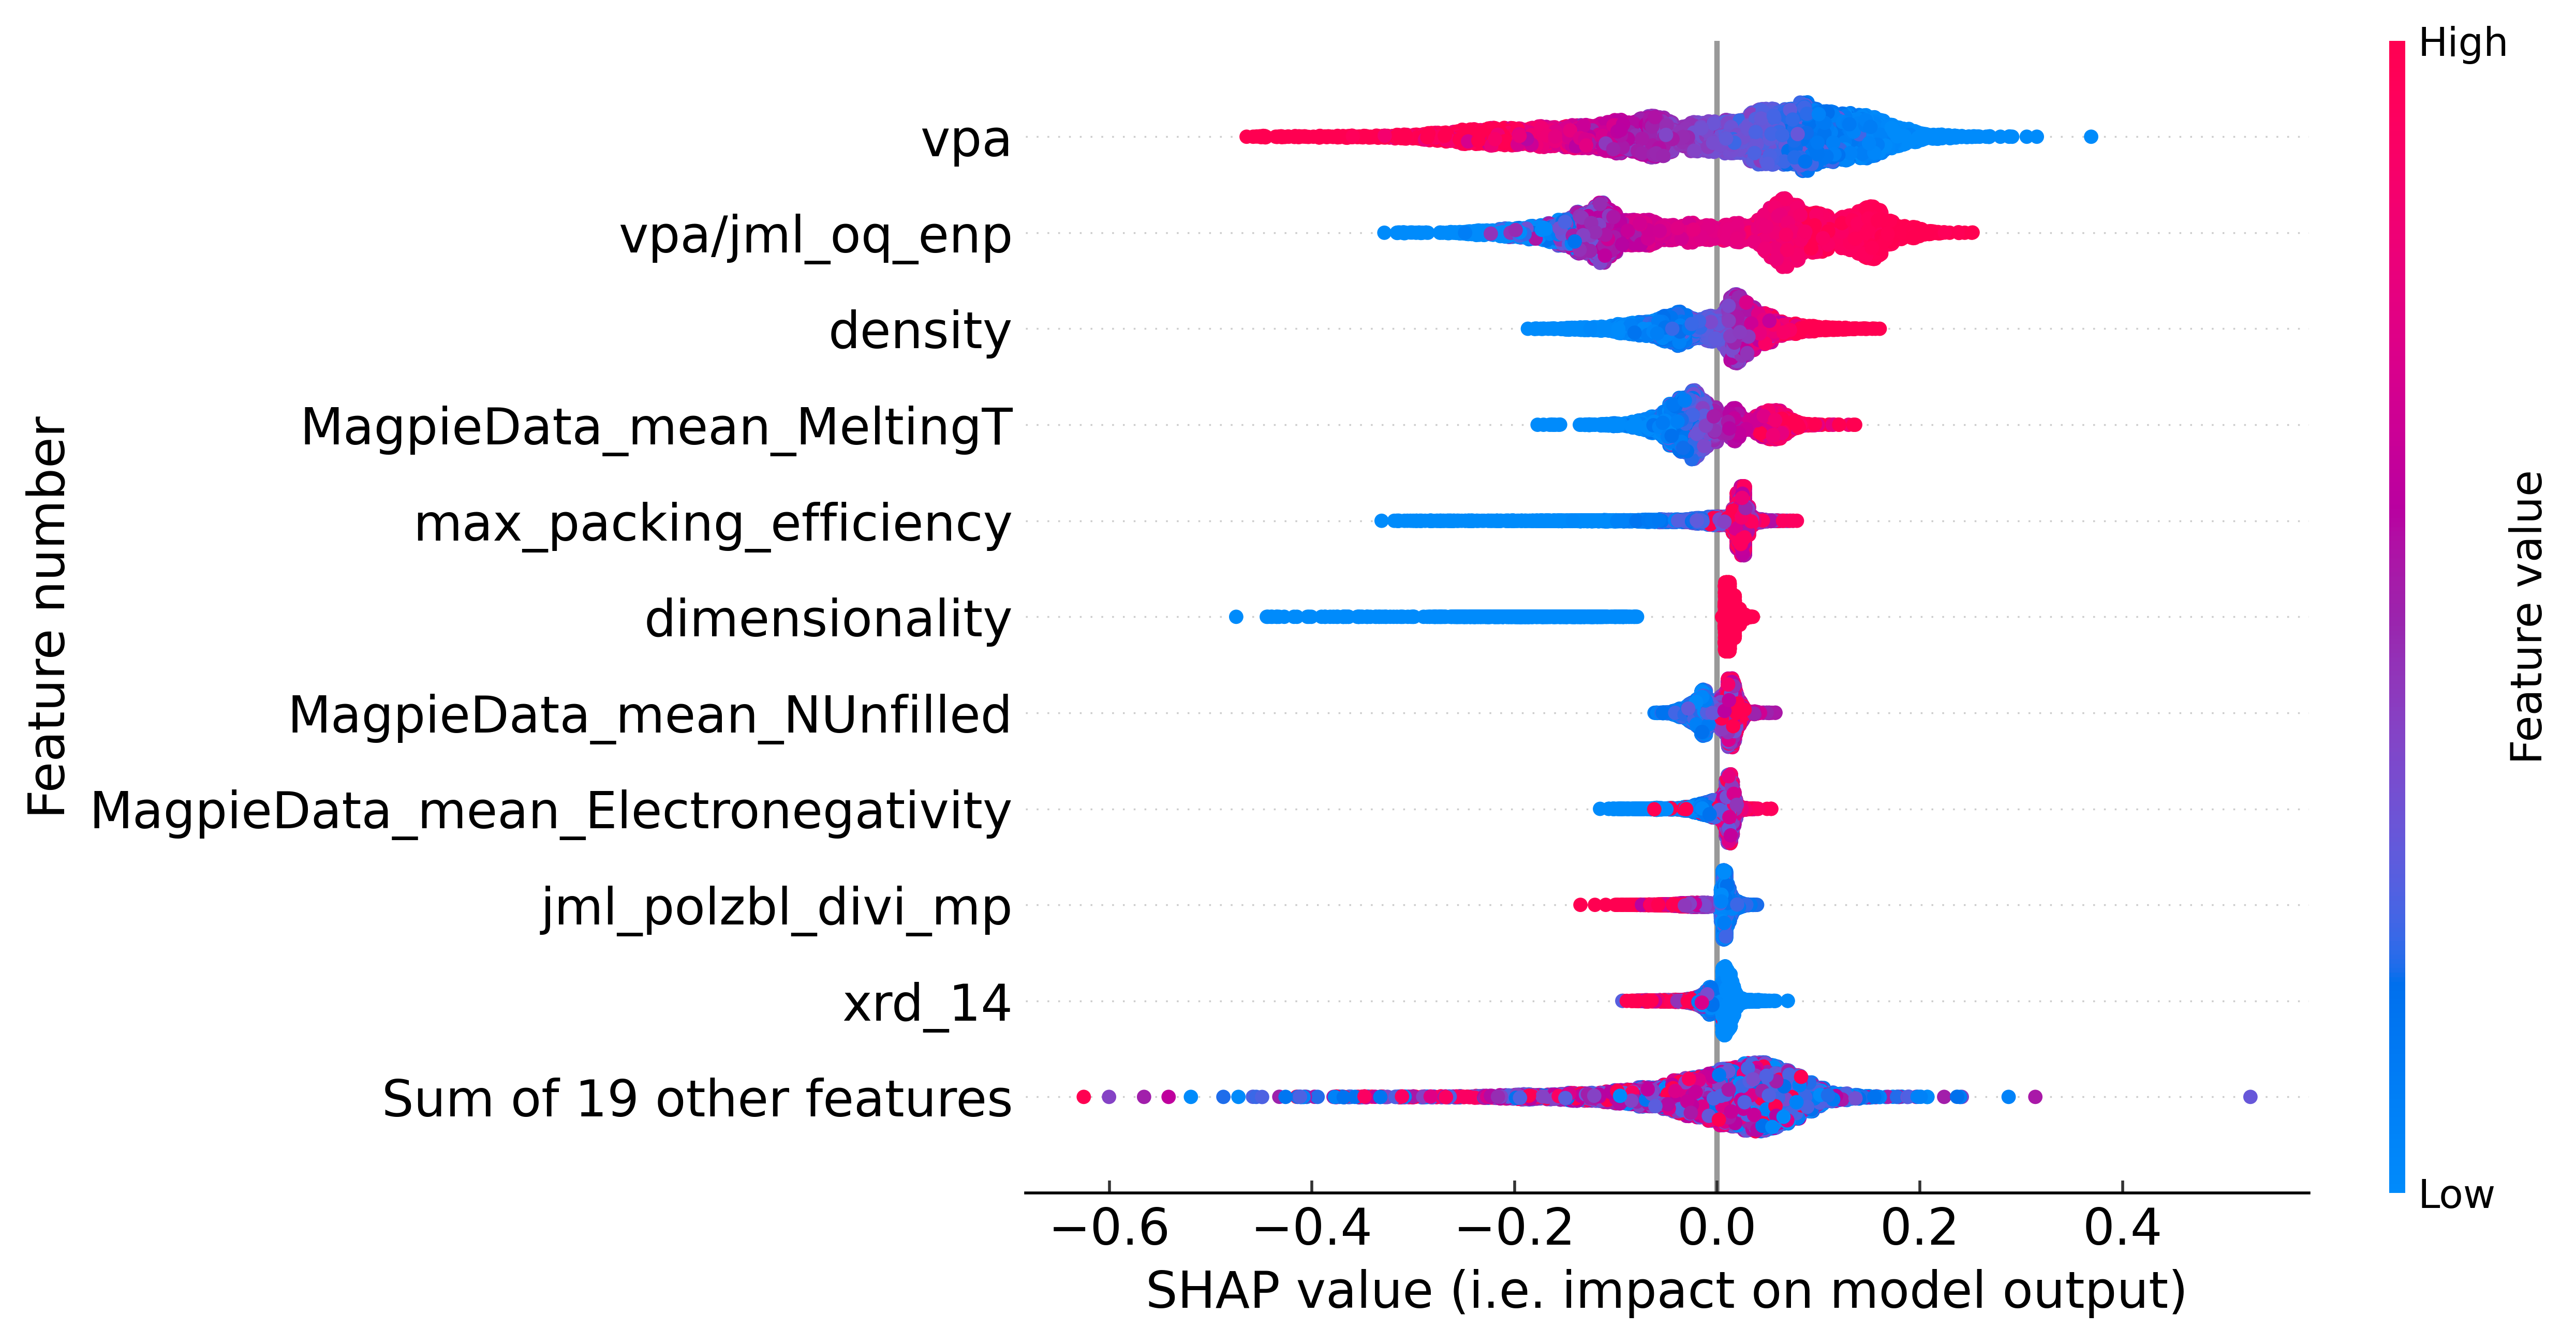

In [114]:
figure(figsize=(10, 10), dpi=500)

shap.plots.beeswarm(shap_values, max_display=11, show=False)

fontsize = 14

plt.ylabel('Feature number', fontsize = fontsize, color='k')
plt.xlabel('SHAP value (i.e. impact on model output)', fontsize = fontsize, color='k')
plt.tick_params(axis = 'both', which = 'major', labelsize = fontsize, direction = 'in')
plt.yticks(fontsize = fontsize, color='k')
plt.xticks(fontsize = fontsize, color='k')

plt.savefig(path_to_save + 'shap_waterfall.png', dpi=600, bbox_inches='tight')
plt.show()

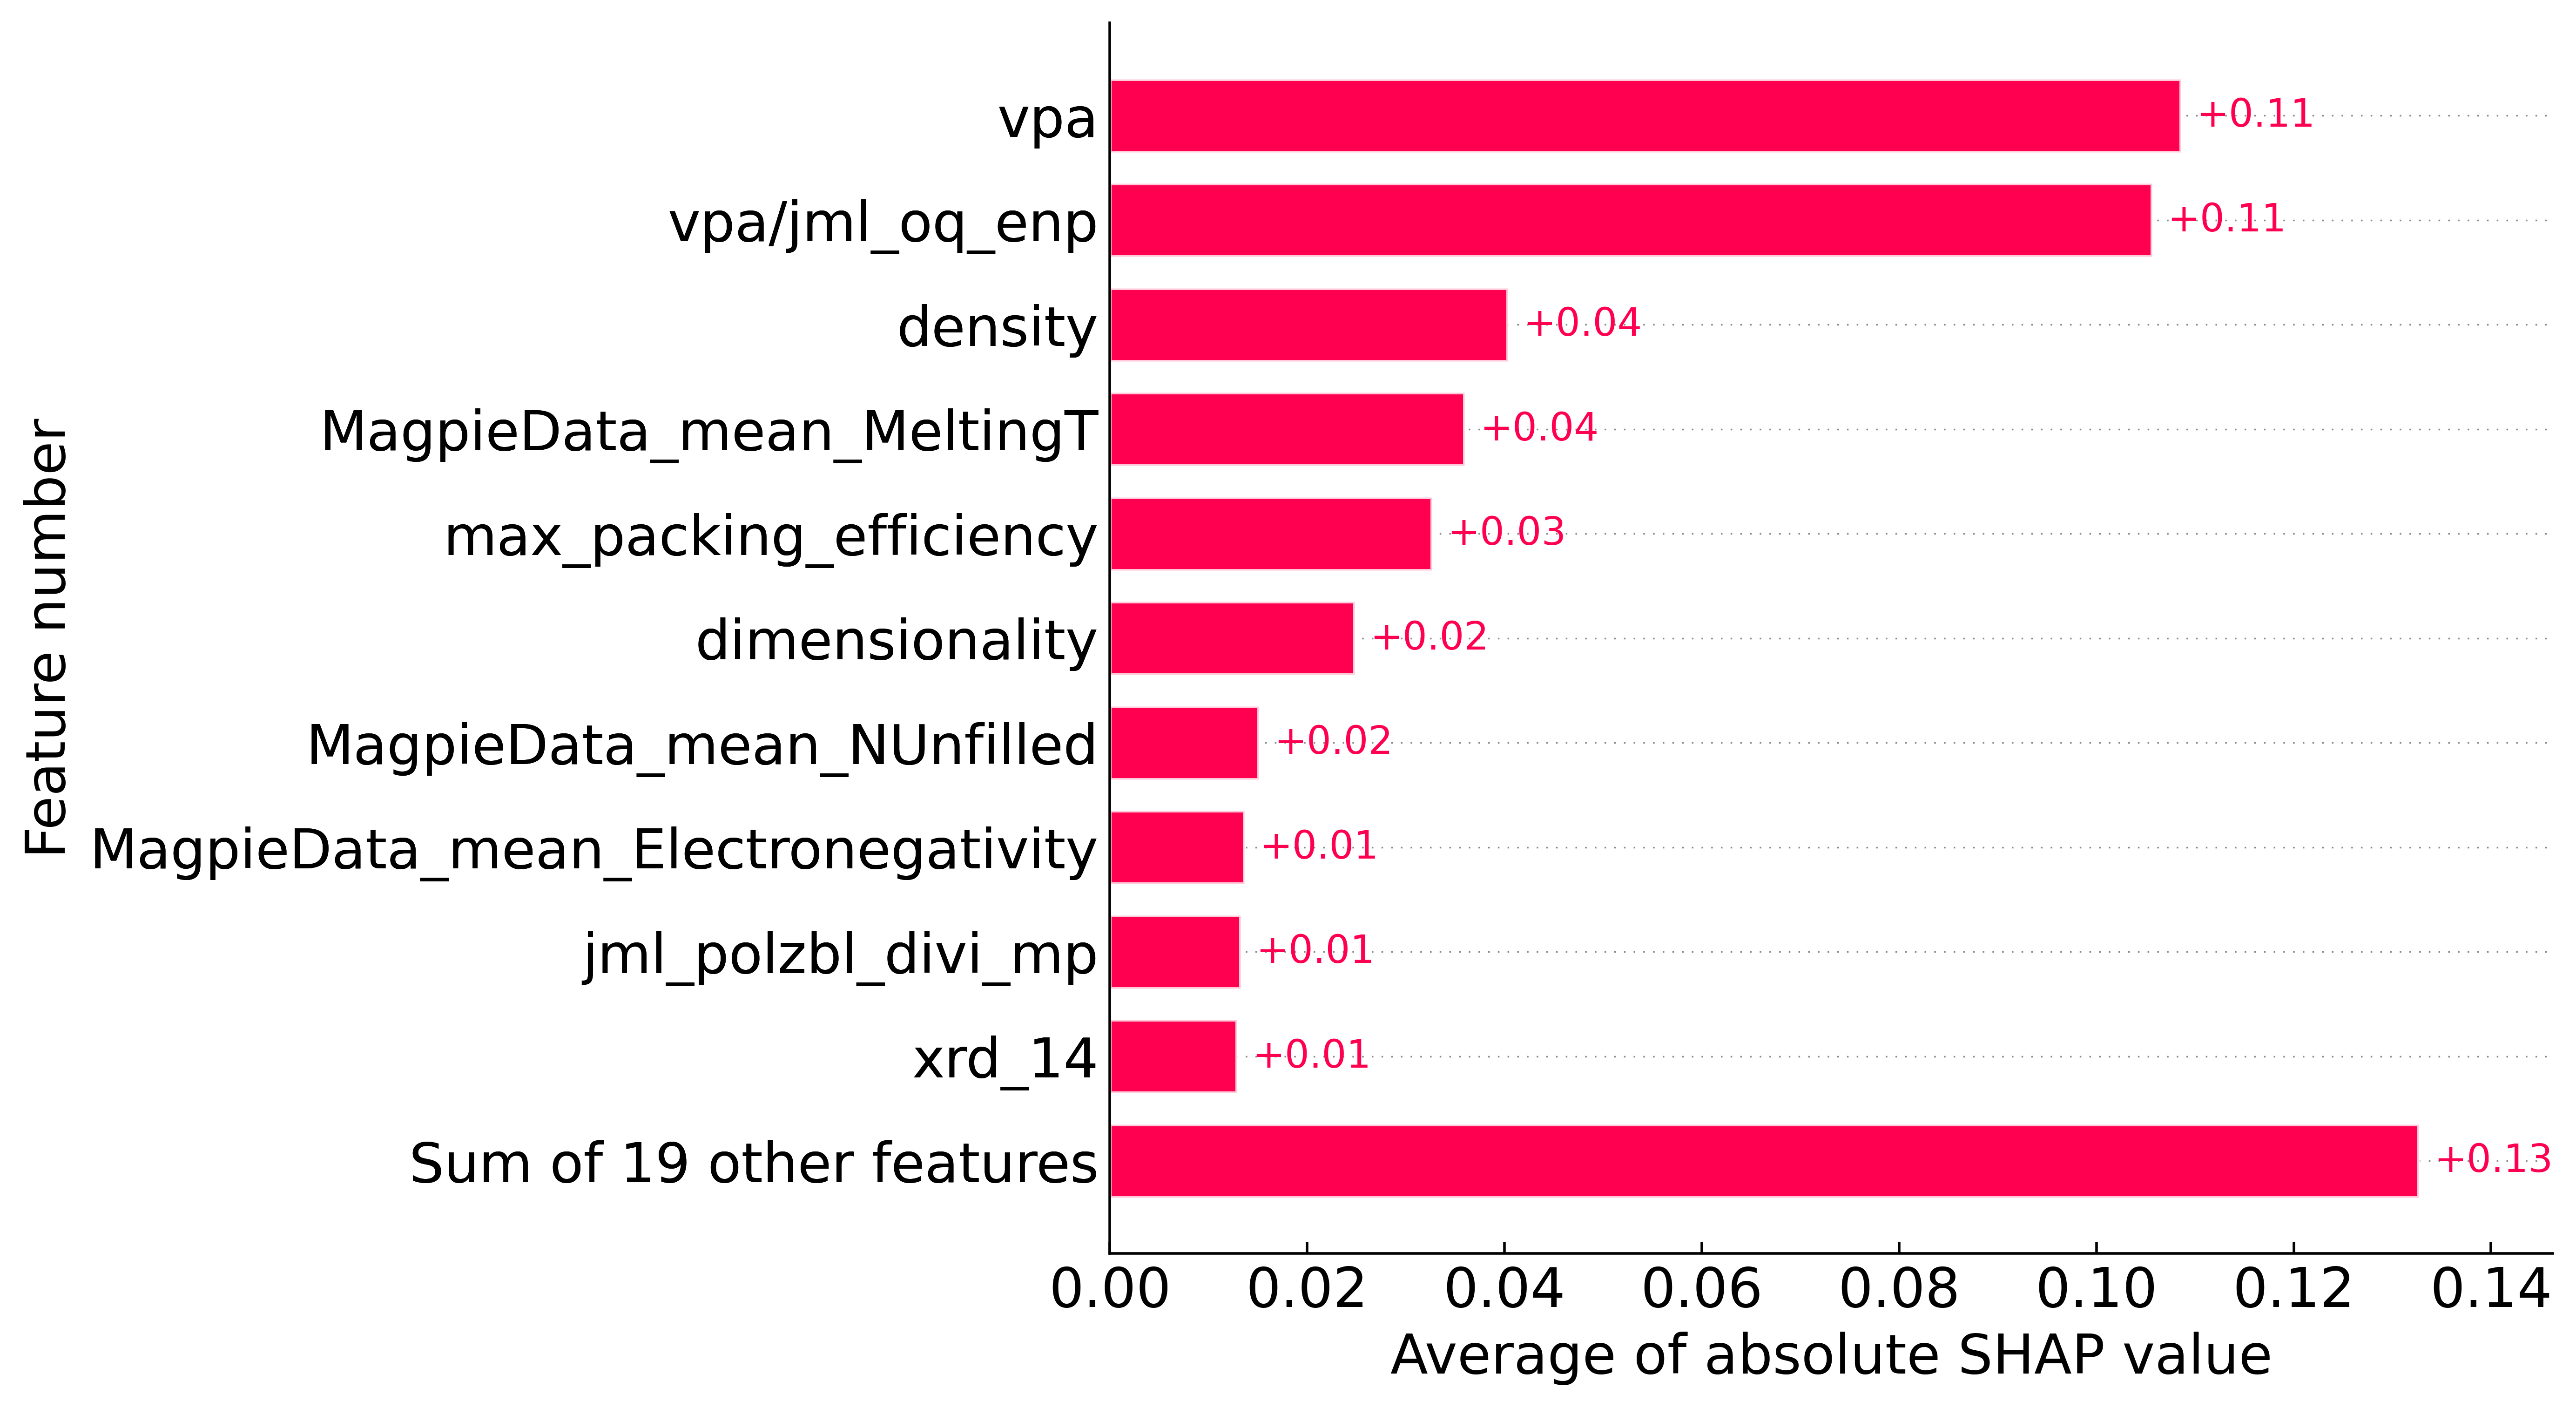

In [115]:
figure(figsize=(10, 10), dpi=500)

shap.plots.bar(shap_values, max_display=11, show=False)

fontsize = 17

plt.ylabel('Feature number', fontsize = fontsize, color='k')
plt.xlabel('Average of absolute SHAP value', fontsize = fontsize, color='k')
plt.tick_params(axis = 'both', which = 'major', labelsize = fontsize, direction = 'in')
plt.yticks(fontsize = fontsize, color='k')
plt.xticks(fontsize = fontsize, color='k')

plt.savefig(path_to_save + 'shap_waterfall.png', dpi=600, bbox_inches='tight')
plt.show()

<Figure size 5000x5000 with 0 Axes>

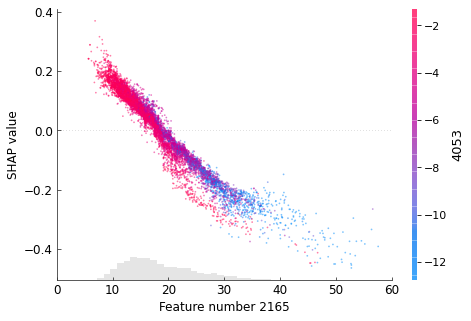

In [116]:
from matplotlib.pyplot import figure
from matplotlib import pyplot as plt

figure(figsize=(10, 10), dpi=500)

shap.plots.scatter(
                    shap_values[:,"2165"], 
                    color=shap_values, 
                    dot_size=3,
                    xmin=0, 
                    xmax=60,
                    alpha=0.5,
                    show=False
                    )

fontsize = 12

plt.ylabel('SHAP value', fontsize = fontsize, color='k')
plt.xlabel('Feature number 2165', fontsize = fontsize, color='k')
plt.tick_params(axis = 'both', which = 'major', labelsize = fontsize, direction = 'in', )
plt.yticks(fontsize = fontsize, color='k')
plt.xticks(fontsize = fontsize, color='k')

plt.savefig(path_to_save + 'shap_scatter.png', dpi=600, bbox_inches='tight')
plt.show()

<Figure size 5000x5000 with 0 Axes>

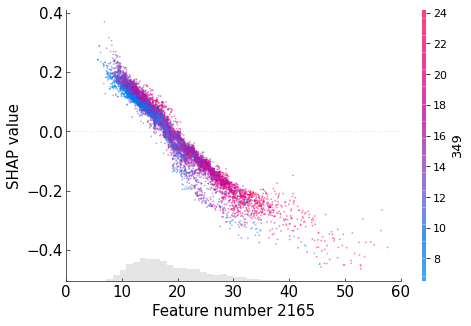

In [117]:
figure(figsize=(10, 10), dpi=500)

shap.plots.scatter(
                    shap_values[:,"2165"], 
                    color=shap_values[:,"349"], 
                    dot_size=3,
                    xmin=0, 
                    xmax=60,
                    alpha=0.5,
                    show=False
                    )

fontsize = 15


plt.ylabel('SHAP value', fontsize = fontsize, color='k')
plt.xlabel('Feature number 2165', fontsize = fontsize, color='k')
plt.tick_params(axis = 'both', which = 'major', labelsize = fontsize, direction = 'in', )
plt.yticks(fontsize = fontsize, color='k')
plt.xticks(fontsize = fontsize, color='k')

plt.savefig(path_to_save + 'shap_waterfall.png', dpi=600, bbox_inches='tight')
plt.show()

<Figure size 5000x5000 with 0 Axes>

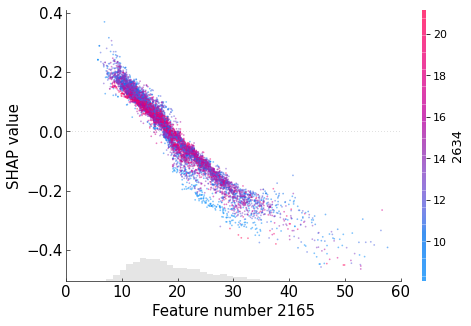

In [118]:
figure(figsize=(10, 10), dpi=500)

shap.plots.scatter(
                    shap_values[:,"2165"], 
                    color=shap_values[:,"2634"], 
                    dot_size=3,
                    xmin=0, 
                    xmax=60,
                    alpha=0.5,
                    show=False
                    )

fontsize = 15


plt.ylabel('SHAP value', fontsize = fontsize, color='k')
plt.xlabel('Feature number 2165', fontsize = fontsize, color='k')
plt.tick_params(axis = 'both', which = 'major', labelsize = fontsize, direction = 'in', )
plt.yticks(fontsize = fontsize, color='k')
plt.xticks(fontsize = fontsize, color='k')

plt.savefig(path_to_save + 'shap_waterfall.png', dpi=600, bbox_inches='tight')
plt.show()

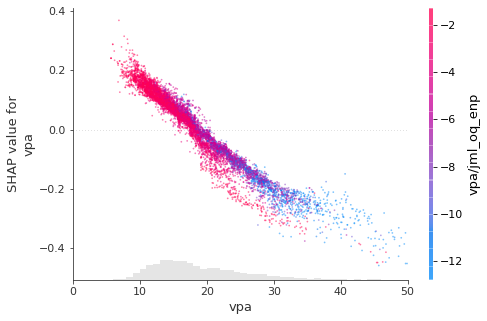

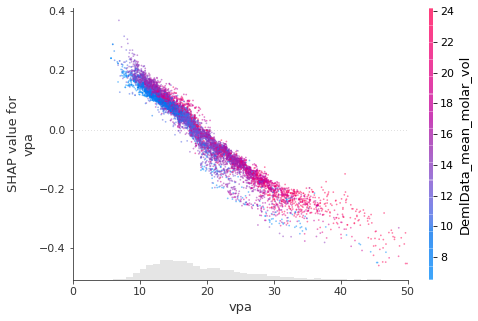

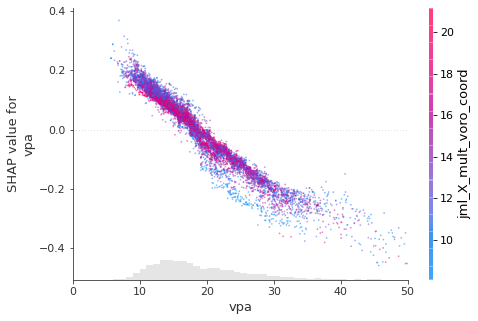

In [119]:
inds = shap.utils.potential_interactions(shap_values[:, "vpa"], shap_values)

for i in range(3):
    shap.plots.scatter(
        shap_values[:,"vpa"], 
        color=shap_values[:, inds[i]], 
        dot_size=3,
        xmin=0, 
        xmax=50,
        alpha=0.5
        )

#### The distribution of volume per atom as a feature within the target space (i.e. the elastic moduli)

In [120]:
import pandas as pd
import numpy as np
import joblib
import os

In [121]:
# Load dataset 
df = joblib.load('database_moduli_merged.pkl')

# Define features and target variable
features = joblib.load('features.pkl')
print('No. of features', len(features))

df.head()

No. of features 4053


minimum_oxidation_state  maximum_oxidation_state  range_oxidation_state  \
0                        0                        0                      0   
1                        0                        0                      0   
2                       -4                        3                      7   
3                        0                        0                      0   
4                        0                        0                      0   

   std_dev_oxidation_state  compound_possible  max_ionic_char  avg_ionic_char  \
0                 0.000000                  1        0.225103        0.033820   
1                 0.000000                  1        0.269189        0.043433   
2                 4.107919                  1        0.201983        0.032317   
3                 0.000000                  1        0.213451        0.040022   
4                 0.000000                  1        0.225103        0.034795   

   avg_anion_electron_affinity  minimum_EN_difference  maximum_EN_difference  \
0                          0.0                    0.0                   0.00   
1                          0.0                    0.0                   0.00   
2                    -534400.0                    0.0                   0.95   
3                          0.0                    0.0                   0.00   
4                          0.0                    0.0                   0.00   

   ...  LUMO_element_ohe_Zr  crystal_system_ohe_cubic  \
0  ...                    0                         0   
1  ...                    0                         0   
2  ...                    0                         0   
3  ...                    0                         1   
4  ...                    0                         0   

   crystal_system_ohe_hexagonal  crystal_system_ohe_monoclinic  \
0                             0                              0   
1                             0                              0   
2                             0                              0   
3                             0                              0   
4                             0                              0   

   crystal_system_ohe_orthorhombic  crystal_system_ohe_tetragonal  \
0                                0                              1   
1                                0                              1   
2                                0                              1   
3                                0                              0   
4                                0                              1   

   crystal_system_ohe_triclinic  crystal_system_ohe_trigonal  log10G_VRH  \
0                             0                            0    1.447158   
1                             0                            0    1.518514   
2                             0                            0    1.740363   
3                             0                            0    1.707570   
4                             0                            0    1.602060   

   log10K_VRH  
0    1.707570  
1    1.633468  
2    1.908485  
3    2.117271  
4    1.690196  

[5 rows x 4055 columns]

In [122]:
# Sub table
df_elastic = df[['log10G_VRH', 'log10K_VRH', 'vpa']]

df_elastic['K_VRH'] = df_elastic['log10K_VRH'].apply(lambda x: 10**(x))
df_elastic['G_VRH'] = df_elastic['log10G_VRH'].apply(lambda x: 10**(x))
df_elastic.head()

c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


log10G_VRH  log10K_VRH        vpa  K_VRH  G_VRH
0    1.447158    1.707570  21.085350   51.0   28.0
1    1.518514    1.633468  25.348929   43.0   33.0
2    1.740363    1.908485  17.470832   81.0   55.0
3    1.707570    2.117271  17.592855  131.0   51.0
4    1.602060    1.690196  24.094482   49.0   40.0

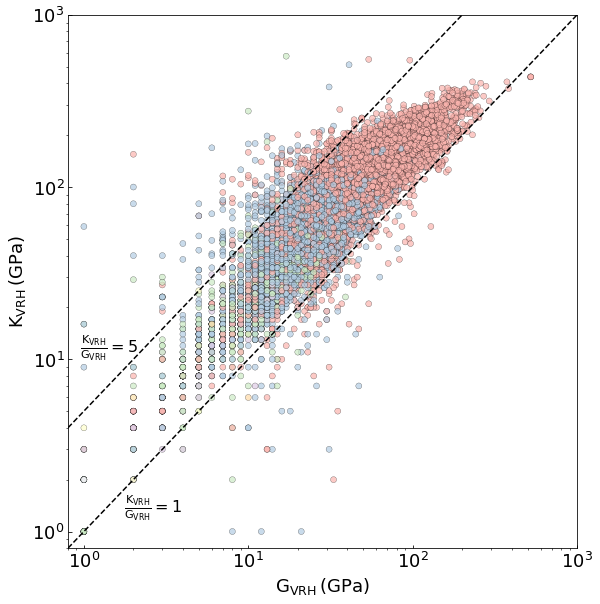

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm

# Target
target = 'log10K_VRH'

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/2. vrh_avg_shear (done)/'
path_to_save = path + target + '_results_backup/'

plt.figure(figsize=(8, 8))

fontsize = 18
labelsize = 18
    
colormap = 'Pastel1' 

plt.scatter(
    x=df_elastic['G_VRH'].tolist(), 
    y=df_elastic['K_VRH'].tolist(), 
    #s=df_elastic['vpa'].tolist(), 
    c=df_elastic['vpa'].tolist(), 
    alpha=0.7,
    edgecolors='k',
    linewidths=0.3,
    cmap=colormap
    )

x1, y1 = [0.8, 10**(3)], [0.8, 10**(3)]
x2, y2 = [0.8, 10**(3)], [5*0.8, 5*10**(3)]
plt.plot(x1, y1, 'k--')
plt.plot(x2, y2, 'k--')

plt.ylim([0.8, 10**(3)])
plt.xlim([0.8, 10**(3)])
plt.tight_layout()
plt.xlabel(r'$\rm{G_{VRH}} \,(GPa)$', fontsize=fontsize)
plt.ylabel(r'$\rm{K_{VRH}} \,(GPa)$', fontsize=fontsize)

plt.xscale('log')
plt.yscale('log')

plt.tick_params(axis='y', which='major', labelsize=labelsize, direction='in')
plt.tick_params(axis='x', which='major', labelsize=fontsize, direction='in')

plt.text(x=1.75, y=1.3, s=r'$\rm{\frac{K_{VRH}}{G_{VRH}}=1}$', fontsize=16)
plt.text(x=0.95, y=11, s=r'$\rm{\frac{K_{VRH}}{G_{VRH}}=5}$', fontsize=16)

plt.savefig(path_to_save + 'regression_elastic_properties.png', dpi = 300, bbox_inches="tight")
plt.show()

In [124]:
df_elastic['vpa'].min()

5.705157856133333

In [125]:
df_elastic['vpa'].max()

117.0233520127207